In [744]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as  plt
from scipy.stats import mannwhitneyu

In [426]:
train_df = pd.read_csv('train.csv', delimiter=',')
test_df = pd.read_csv('test.csv', delimiter=',')


## План исследования:
1) Описание набора данных и признаков
2) Первичный анализ признаков
3) Первичный визуальный анализ признаков
4) Закономерности, инсайты, особенности данных
5) Предобработка данных
6) Создание новых признаков
7) Кросс валидация, подбор параметров
8) Построение кривых валидации и обучения
9) Прогноз для тестовой и отложенной выборки
10) Оценка модели с описанием выбранной метрики
11) Выводы

In [6]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 1) Описание набора данных и признаков:
Для исследования я взял  набор данных с платформы Kaggle, который заранее был разбит на обучающую и отложенную выборки.
Данные содержат в себе 11 признаков. В тренировочной выборке 891 строка (68%), а в отложенной 418 строк (32%). Склеили обе таблицы, чтобы составить общее представление о данных.
Самым интересным признаком является выживаемость пассажира: выжил он или нет. Этот параметр мы и будем прогнозировать и классифицировать.
Вероятнее всего наиболее информативными признаками будут: пол, класс каюты, возраст.

In [258]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [752]:
df = pd.concat([train_df, test_df])
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cab_nan,Age_NaN,Young,Old,Family,Title,Alone
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.644003,29.485863,0.498854,0.385027,33.294646,0.757830,1.394797,0.774637,0.200917,0.087853,0.072574,0.883881,2.067991,0.603514
std,378.020061,0.486592,0.837836,0.478997,13.409719,1.041658,0.865560,51.738888,1.564669,0.653817,0.417981,0.400839,0.283190,0.259536,1.583639,1.273389,0.489354
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,655.000000,0.000000,3.000000,1.000000,28.724891,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,982.000000,1.000000,3.000000,1.000000,36.500000,1.000000,0.000000,31.275000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,8.000000,3.000000,1.000000,1.000000,1.000000,1.000000,10.000000,4.000000,1.000000


Вс

## 2)Первичный анализ признаков


In [756]:
train_otchet = pd.read_csv('train.csv', delimiter=',')
test_otchet = pd.read_csv('test.csv', delimiter=',')
otchet = pd.concat([train_otchet, test_otchet])
otchet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [758]:
otchet.drop('PassengerId', axis=1).describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [759]:
otchet.drop('PassengerId', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 155.0+ KB


In [761]:
features = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
print("Общая выборка: мужчины")
print(otchet[otchet["Sex"] == "male"][features].describe())

print("Общая выборка: женщины")
print(otchet[otchet["Sex"] == "female"][features].describe())




Общая выборка: мужчины
              Age        Fare      Pclass       SibSp       Parch
count  658.000000  842.000000  843.000000  843.000000  843.000000
mean    30.585228   26.154601    2.372479    0.413998    0.247924
std     14.280581   42.486877    0.811908    0.997928    0.708938
min      0.330000    0.000000    1.000000    0.000000    0.000000
25%     21.000000    7.876050    2.000000    0.000000    0.000000
50%     28.000000   11.887500    3.000000    0.000000    0.000000
75%     39.000000   26.550000    3.000000    1.000000    0.000000
max     80.000000  512.329200    3.000000    8.000000    9.000000
Общая выборка: женщины
              Age        Fare      Pclass       SibSp       Parch
count  388.000000  466.000000  466.000000  466.000000  466.000000
mean    28.687088   46.198097    2.154506    0.652361    0.633047
std     14.576962   63.292599    0.866181    1.101009    1.049579
min      0.170000    6.750000    1.000000    0.000000    0.000000
25%     19.000000   10.504175 

Проведя анализ для отложенной и тренировочной выборок по полу, можем сделать следующие выводы:
## Для тренировочной:
Средний возраст мужчин был выше: 30.7 против 29.9
Женский билет стоил дороже, чем мужской
Средний класс мужского билета был выше чем женского
В среднем, семьи путешествующих женщин были больше мужских
## Для отложенной:
Средний возраст мужчин и женщин не отличается
Мужские билеты по-прежнему дешевле женских
Средний класс мужского билета также выше женского
Женщины все также путешествуют с большей семьей

Применив критерий Мана-Уитни, подтверидили, что средний возраст и средня стоимость билета у мужчин и женщин действительно отличается.

In [145]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


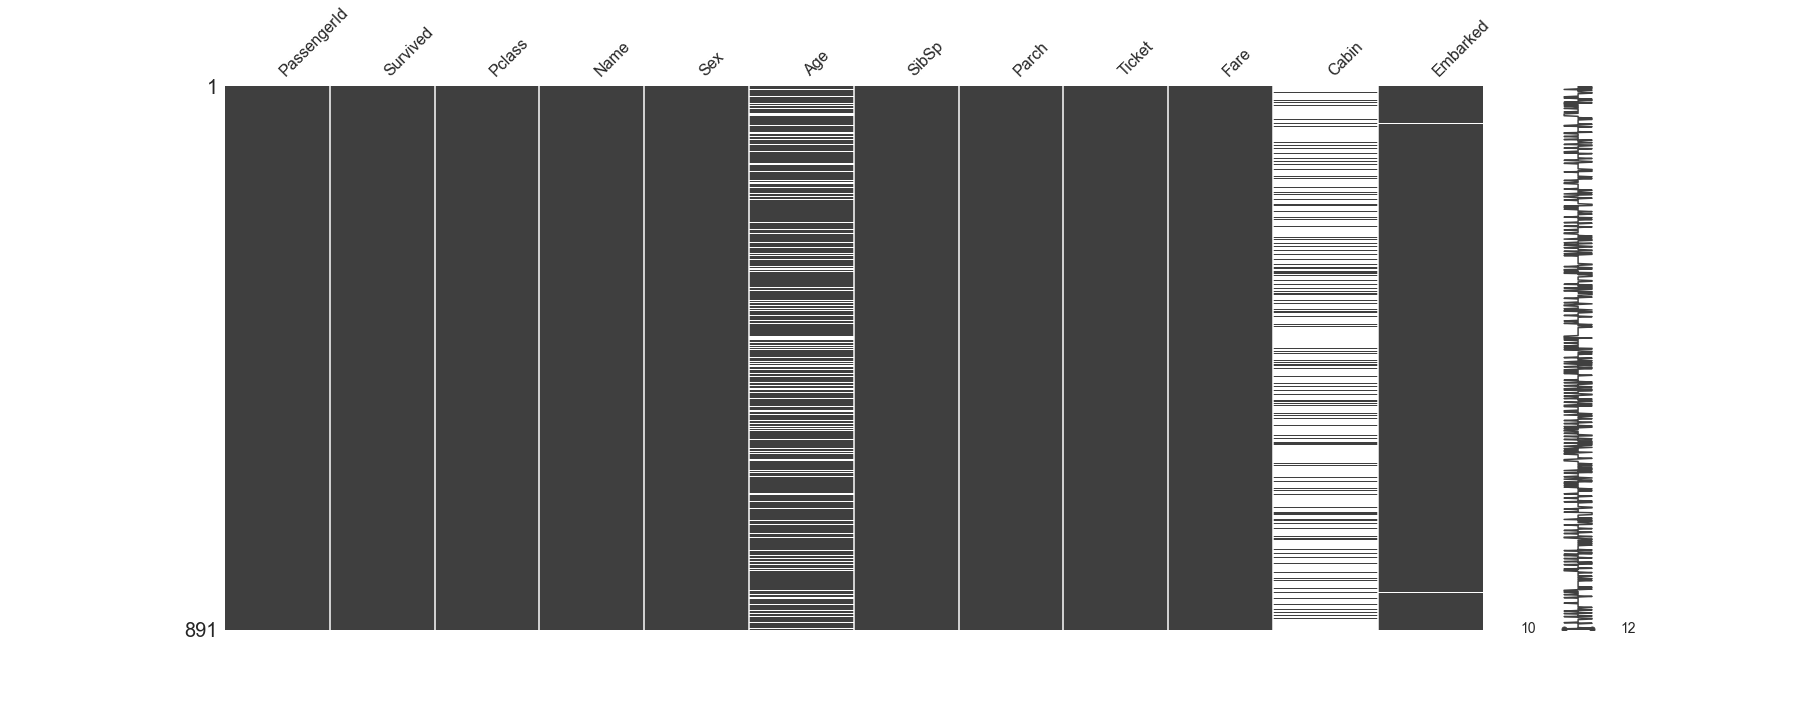

In [120]:
from IPython.display import Image
Image('missing_info.png')

<AxesSubplot:>

<Figure size 360x360 with 0 Axes>

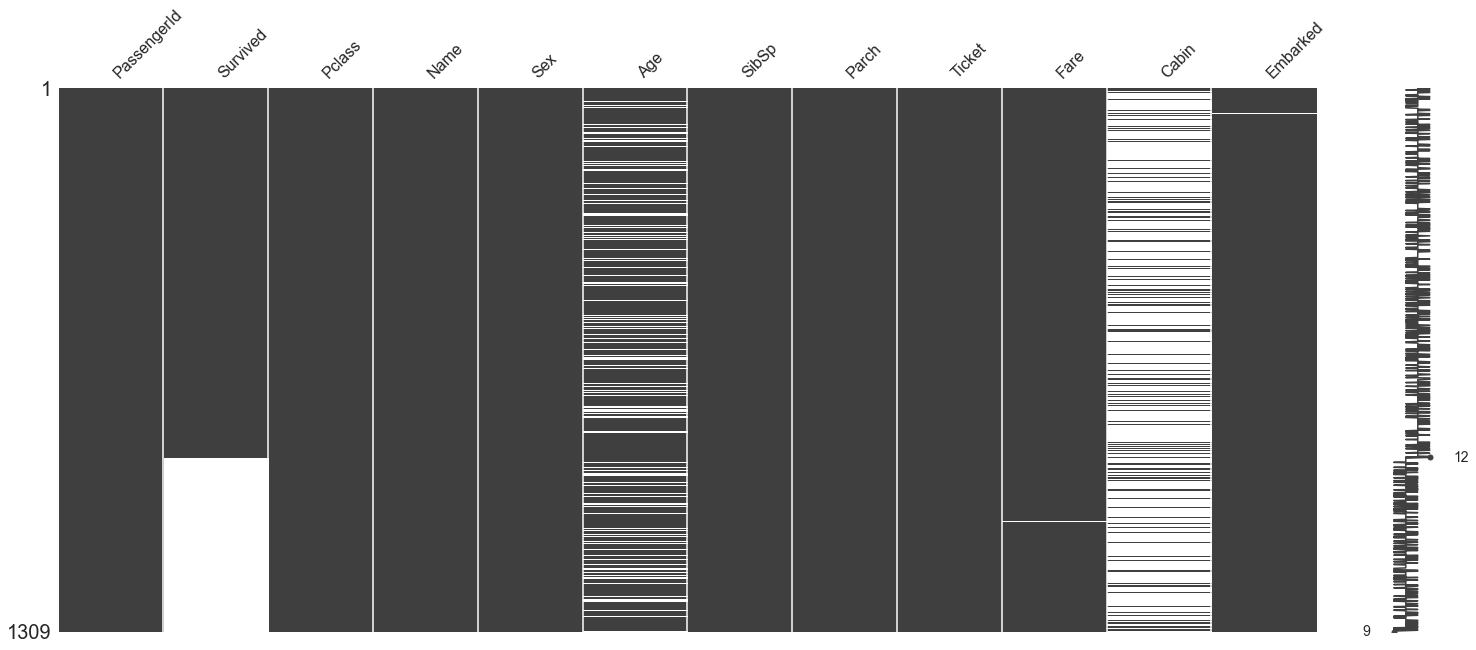

In [764]:
import missingno as msn
plt.figure(figsize=(5,5))
msn.matrix(otchet)

## Краткая сводка по данным:
Анализируя график пропущенных значений делаем вывод, что в возрасте отстутсвуют 177 значений, в расположении кабин отсутствуют 687 значений и в городе посадки отсутствуют 2 значения. Больше всего пассажиров мужского пола 64.7%, средний возраст пассажиров 30 лет.
Данные имеют следующие признаки:
1) Surived - бинарный признак: выжил - 1 / не выжил - 0 пассажир
2) Pclass - класс билета пассажира 1, 2, 3
3) Name - Имя пассажира
4) Sex - пол пассажира мужчина / женщина
5) Age - возраст пассажира
6) SibSp - количество братьев/сестер или супругов, путешествующих с каждым пассажиром
7) Parch- Количество родителей детей
8) Ticket - номер билета
9) Fare - стоимость билета
10) Cabin - расположение/номер кабины
11) Embarked - город посадки на борт: S, C, Q


## Первичные выводы:
Наиболее интересными признаками, которые, с точки зрения логики, смогут определить выжил пассажир или нет являются:
1) пол и возраст пассажира, т.к капитан коробля приказал сажать на шлюпки первым делом женщин и детей(а в данном случае признак Parch,кол-во родителей, тоже будет играть существенную роль)

2) класс билета: т.к например каюты первого класса были расположены выше остальных. Из-за того, что столкновение с айсбергом произошло в ночное время, то большинство пассажиров коробля спали, и люди в нижних каютах и отделениях коробля имели гораздо меньше шансов на выживание, чем люди находившееся выше. Следуя этому выводу хотелось бы также включить в исследование расположение каюты, но т.к по этому признаку много утерянных данных, а построение модели коробля со всеми уникальными значениями - очень комплексная задача, то мы немного свернем этот признак о чем пойдет речь чуть позже.

3) Следуя здравому смыслу, можно точно сказать, что номер билета никак не повлияет на посадку. Город посадки может оказывать влияние, потому что пассажиры, которые заходили на борт последними, могли располагаться выше предыдущих. В имени пассажира можно найти обращение к нему, логично предположить, что высокопоставленный пассажир имел больше шансов на спасение.

4) Стоимость билета и количество братьев/сестер/супругов/родитилей могут повлиять на выживаемость пассажира, поэтому эти признаки исключать не будем.


In [115]:
train_df.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True), train_df.groupby(['Pclass', 'Sex', 'Embarked'])['Survived'].value_counts(normalize=True)


(Pclass  Sex     Survived
 1       female  1           0.968085
                 0           0.031915
         male    0           0.631148
                 1           0.368852
 2       female  1           0.921053
                 0           0.078947
         male    0           0.842593
                 1           0.157407
 3       female  0           0.500000
                 1           0.500000
         male    0           0.864553
                 1           0.135447
 Name: Survived, dtype: float64,
 Pclass  Sex     Embarked  Survived
 1       female  C         1           0.976744
                           0           0.023256
                 Q         1           1.000000
                 S         1           0.958333
                           0           0.041667
         male    C         0           0.595238
                           1           0.404762
                 Q         0           1.000000
                 S         0           0.645570
                 

Из сводной таблицы можно подтвердить несколько, ранее выдвинутых предположений. Маршрут корабля проходил следующим образом: порт S-> порт C-> порт Q -> Нью-Йорк.
Таким образом имеем:
Выживаемость женщины из первого класса составляет почти 97%. 100% женщин из первого класса, севших в порту Q выжили, из севших в порту S выжило 96%, из порта C почти 98%
Выживаемость мужчины из первого класса составляет 63%. 1 мужчина из первого класса, севший в порту Q погиб, из севших в порту S выжило 35%, из порта C  40%
Выживаемость женщины из второго класса составляет 92%. 100% женщин из первого класса, севших в порту Q и С выжили, из севших в порту S выжило 91%
Выживаемость мужчины из второго класса составляет почти 16%. 20% мужчин из второго класса, севшие в порту С, выжили, из севших в порту S выжило 15%, один мужчина, севший в порту Q, погиб
Выживаемость женщины из третьего класса составляет 50%. 73% женщин из третьего класса, севших в порту Q выжили, из севших в порту С выжило 65%, из порта S выжили 37.5%
Выживаемость мужчины из третьего класса составляет 13.5%. 23% мужчин из третьего класса, севшие в порту С, выжили, из севших в порту S выжило 12.8%, из севшиех в порту Q выжили 7.7%
Предположение о посадке полностью подтверждается для женщин. У мужчин в случае порта Q логика не срабатывает. Позже мы проверим еще раз действительно ли порт посадки влияет на выживаемость.


## 3) Первичный визуальный анализ признаков

Построим несколько графиков, чтобы визуализировать данные.

Text(0.5, 1.0, 'Стоимость билетов по классам')

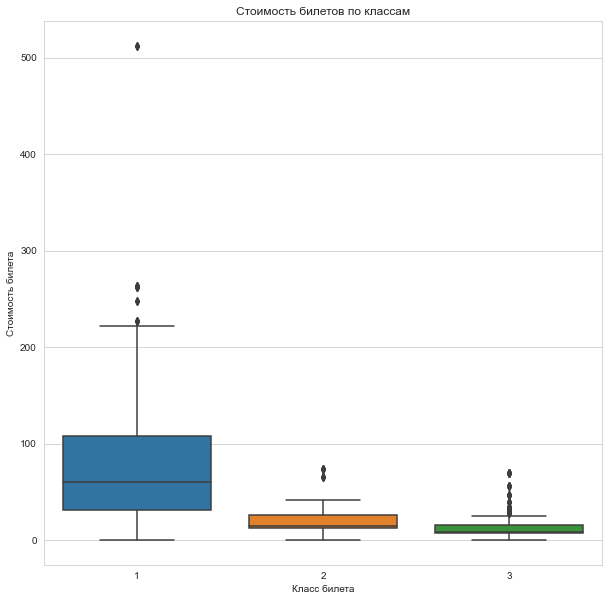

In [768]:

plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Fare', data=otchet)
plt.xlabel('Класс билета')
plt.ylabel('Стоимость билета')
plt.title('Стоимость билетов по классам')


График получился не очень красивым из-за выбросов. Давайте уберем все значения по классам, которые отличаются от среднего больше чем на 2 ско.

Text(0.5, 1.0, 'Стоимость билетов по классам без выбросов')

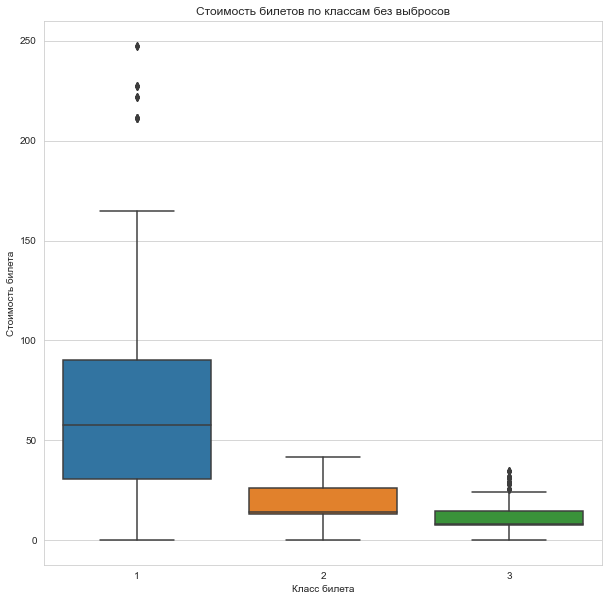

In [771]:
plt.figure(figsize=(10,10))
p1_std, p1_mn = df[df['Pclass']==1]['Fare'].std(), df[df['Pclass']==1]['Fare'].mean()
p2_std, p2_mn = df[df['Pclass']==2]['Fare'].std(), df[df['Pclass']==2]['Fare'].mean()
p3_std, p3_mn = df[df['Pclass']==3]['Fare'].std(),df[df['Pclass']==3]['Fare'].mean()
fare_pclass1_no_out = df[(df['Pclass'] == 1) & (abs(df['Fare'] - p1_mn) < 2 * p1_std)]
fare_pclass2_no_out = df[(df['Pclass'] == 2) & (abs(df['Fare'] - p2_mn) < 2 * p2_std)]
fare_pclass3_no_out = df[(df['Pclass'] == 3) & (abs(df['Fare'] - p3_mn) < 2 * p3_std)]
train_df_no_outs = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)
sns.boxplot(x='Pclass', y='Fare', data=train_df_no_outs)
plt.xlabel('Класс билета')
plt.ylabel('Стоимость билета')
plt.title('Стоимость билетов по классам без выбросов')

Как видно, средняя стоимость билетов между классами отличается, в первом и в третьем классе есть выбросы (в случае третьего их очень много, порой стоимость билета 3го класса превышала среднюю по второму клссу). Можно сделать предположение о перепродаже билетов перед отправкой корабля для 3го класса и повышенной стоимости кают класса люкс у билетов 1го класса.

Text(0.5, 1.0, 'Распределеие пассажиров по сумме родители детей')

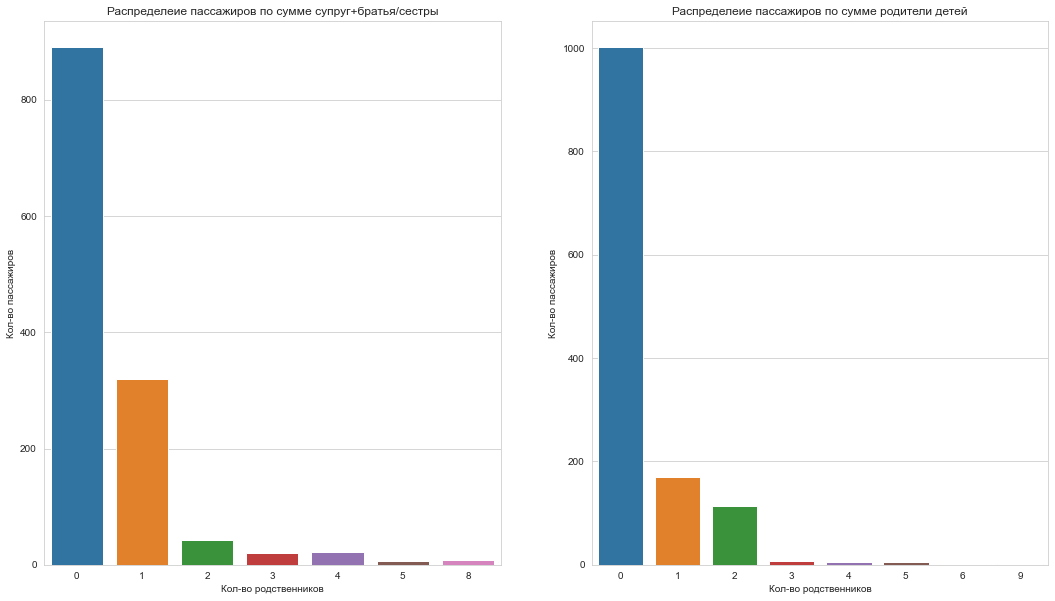

In [775]:
plt.figure(figsize=(18,10))
plt.subplot(1, 2, 1)
sns.countplot(data=otchet, x='SibSp')
plt.xlabel('Кол-во родственников')
plt.ylabel("Кол-во пассажиров")
plt.title('Распределеие пассажиров по сумме супруг+братья/сестры')
plt.subplot(1,2,2)
sns.countplot(data=otchet, x='Parch')
plt.xlabel('Кол-во родственников')
plt.ylabel("Кол-во пассажиров")
plt.title('Распределеие пассажиров по сумме родители детей')

Как видно - большинство пассажиров путешествовало в одиночку, но были и очень большие семьи.

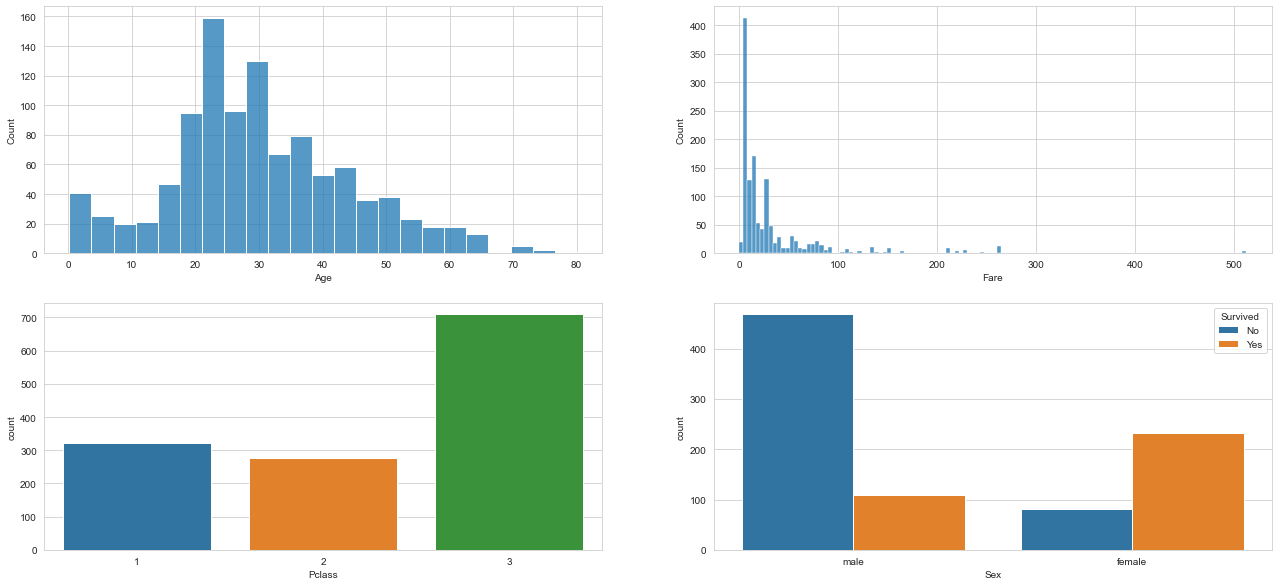

In [776]:
tab = pd.crosstab(otchet['Embarked'], otchet['Pclass'])
tab = tab.div(tab.sum(1).astype(float), axis=0)
figure= plt.subplots(figsize=(22, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=otchet['Age'])
plt.subplot(2, 2, 2)
sns.histplot(data=otchet['Fare'])
plt.subplot(2, 2, 3)
sns.countplot(data=otchet, x='Pclass')
plt.subplot(2, 2, 4)
sns.countplot(x='Sex', hue='Survived', data=otchet)
plt.legend(title='Survived',loc='upper right', labels=['No','Yes'])

Большинству пассажиров было от 20 до 30 лет. Большинство билетов было куплено не более чем за 16$, больше всего пассажиров было в третьем классе. Мужчин на корабле было больше чем женщин, а женщины имели больше шансов на выживание чем мужчины.

График наглядно отображает статистику по выжившим и погибшим пассажирам из тренировочной выборки

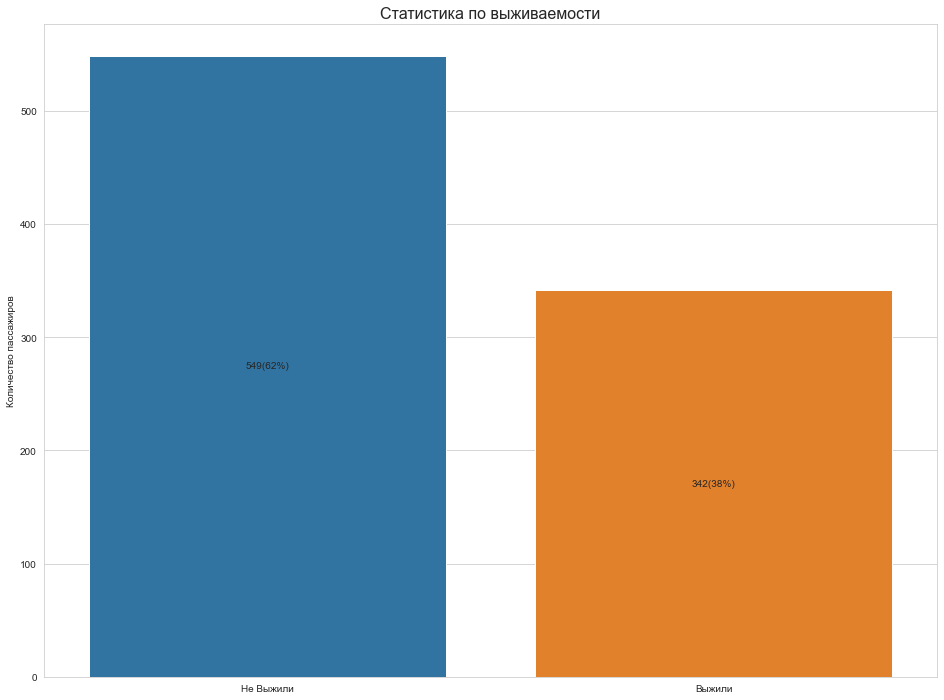

In [777]:
figure, survive_bar = plt.subplots(figsize=(16, 12))
sns.barplot(x= train_df["Survived"].value_counts().index, y = train_df["Survived"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['Не Выжили', 'Выжили'])
survive_bar.set_ylabel('Количество пассажиров')
survive_bar.set_title('Статистика по выживаемости', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train_df.Survived))+')',
               horizontalalignment='center', verticalalignment='center')

Спаслось 342 пассажира из 891

Text(0, 0.5, 'Percentage')

<Figure size 1080x720 with 0 Axes>

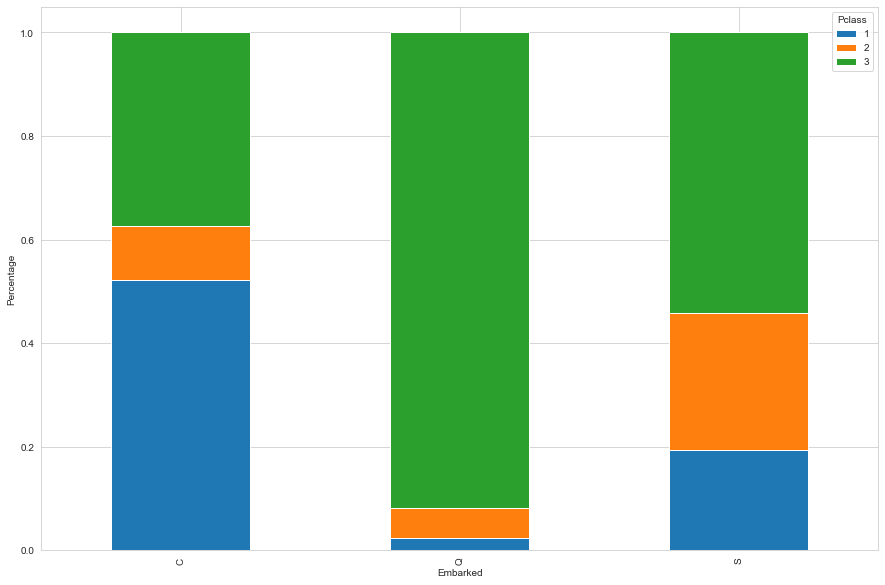

In [786]:
plt.figure(figsize=(15,10))
tab.plot(kind="bar", stacked=True, figsize=(15,10))
plt.xlabel('Embarked')
plt.ylabel('Percentage')


<Figure size 432x288 with 0 Axes>

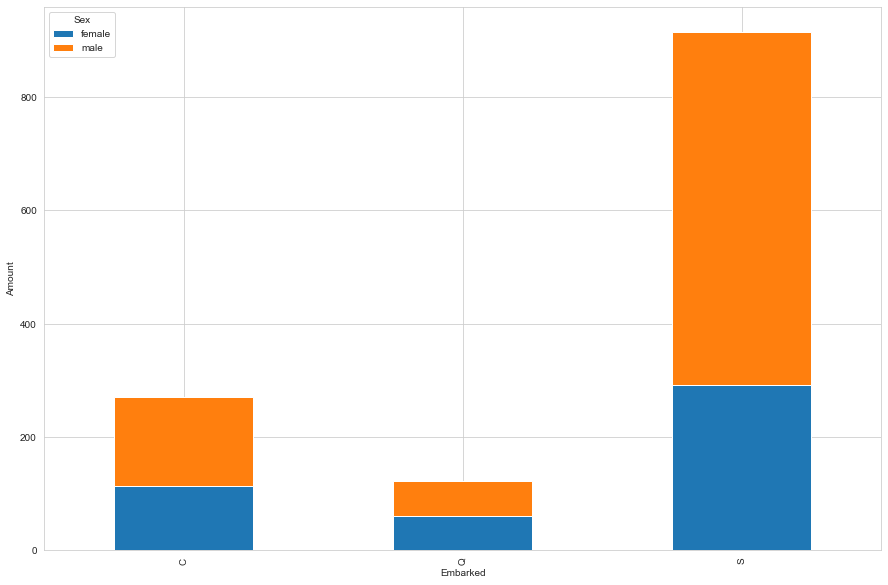

In [788]:
plt.figure()
tab_sex = pd.crosstab(otchet['Embarked'], otchet['Sex'])
tab_sex = tab_sex.div(tab.sum(1).astype(float), axis=0)
tab_sex.plot(kind="bar", stacked=True, figsize=(15,10))
plt.xlabel('Embarked')
plt.ylabel('Amount')
plt.show()

Ранее я выдвинул гипотезу о том, что более поздняя посадка на борт по маршруту: порт S-> порт C-> порт Q -> Нью-Йорк - повышает шансы пассажира на выживание. Для мужчин эта логика не выполнялась. Как видно из полученных графиков это скорее всего связано с количеством пассажиров 3го класса, которые зашли на борт в порту Q.

Text(0.5, 1.0, 'Соотношение выживаемости по классам для женщин')

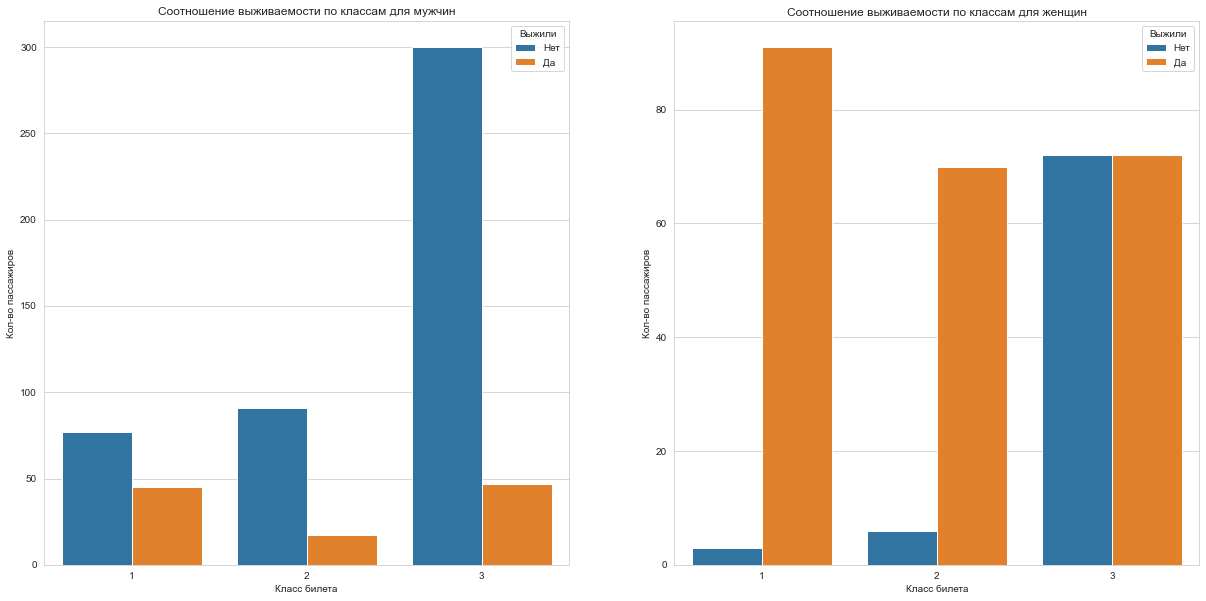

In [793]:
figure= plt.subplots(figsize=(32, 10))
plt.subplot(1,3,1)
sns.countplot(x='Pclass', hue='Survived', data=train_otchet[train_otchet.Sex == 'male'])
plt.ylabel('Кол-во пассажиров')
plt.xlabel('Класс билета')
plt.legend(title='Выжили',loc='upper right', labels=['Нет','Да'])
plt.title('Соотношение выживаемости по классам для мужчин')
plt.subplot(1,3,2)
sns.countplot(x='Pclass', hue='Survived', data=train_otchet[train_otchet.Sex == 'female'])
plt.ylabel('Кол-во пассажиров')
plt.xlabel('Класс билета')
plt.legend(title='Выжили',loc='upper right', labels=['Нет','Да'])
plt.title('Соотношение выживаемости по классам для женщин')

Text(0.5, 1.0, 'Соотношение выживаемости по классам')

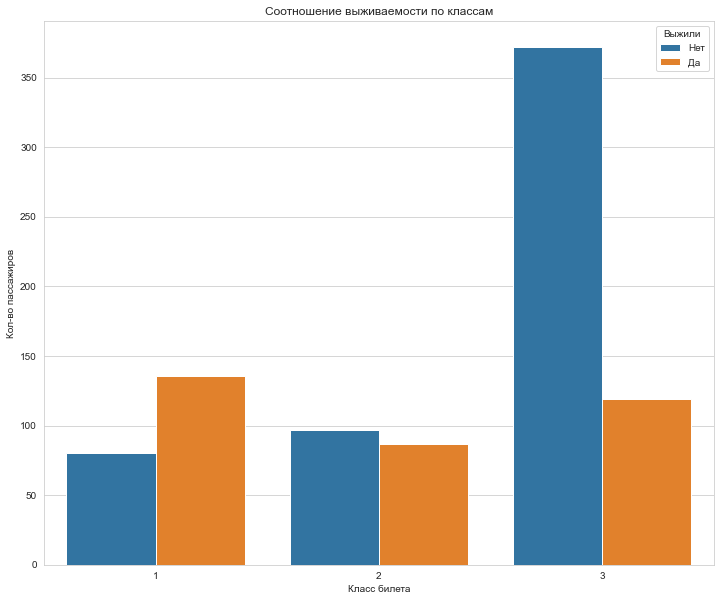

In [811]:
plt.figure(figsize=(12,10))
sns.countplot(x='Pclass', hue='Survived', data=train_otchet)
plt.ylabel('Кол-во пассажиров')
plt.xlabel('Класс билета')
plt.legend(title='Выжили',loc='upper right', labels=['Нет','Да'])
plt.title('Соотношение выживаемости по классам')

## Общая визуализация шансов на спасение

Text(0.5, 1.0, 'Общая сводка по выживаемости')

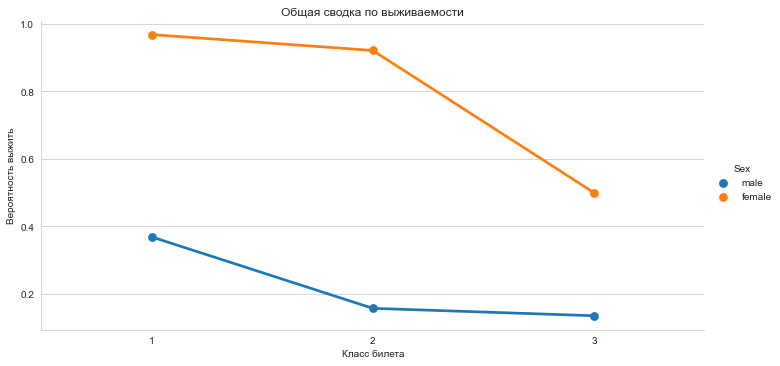

In [794]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', aspect=2, data=train_otchet, kind='point', ci=None)
plt.xlabel('Класс билета')
plt.ylabel('Вероятность выжить')
plt.title('Общая сводка по выживаемости')

Анализируя графики, выживаемость пассажира действительно сильно зависит от его пола и класса билета. Так женщины из любого класса имеют гораздо больше шансов на выживание, чем мужчины. Конкретнее: женщины из первого и второго класса имеют гораздо больше шансов на выживание чем все мужчины и женщины из третьего класса. Женщины из третьего класса имеют больше шансов на выживание, чем мужчины из первого класса. Ну и судьба мужчин второго и третьего класса вовсе не завидна.

## 4) Закономерности, инсайты, особенности данных

<AxesSubplot:>

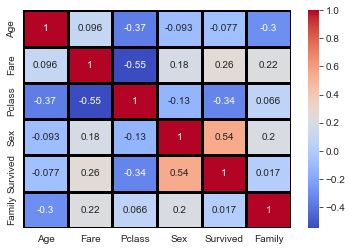

In [796]:
features_corr = ["Age", "Fare", "Pclass", "SibSp", "Parch", 'Sex', 'Survived']
tabl_feature_coefs = train_otchet[features_corr]
tabl_feature_coefs['Sex'] = tabl_feature_coefs['Sex'].map({'male': 0, 'female': 1})
tabl_feature_coefs['Family'] = tabl_feature_coefs['SibSp'] + tabl_feature_coefs['Parch']
tabl_feature_coefs.drop(['SibSp', 'Parch'], axis=1, inplace=True)
sns.heatmap(tabl_feature_coefs.corr(), annot=True, cmap='coolwarm', linewidths=3, linecolor='black')



## Выводы по визуальному анализу данных:
Для корелляционной матрицы я преобразовал признак пол к бинарному виду, где 0-мужчина, а 1- женщина. Также сделал новый признак семья состоящий из SibSp + Parch
В результате наблюдаем следующие заметные зависимости:
## Отрицательная корреляция между:
Классом и стоимостью билета: чем выше стоимость билета, тем ниже цифра класса, то есть престижнее класс билета.
Классом и возрастом: чем выше возраст, тем ниже цифра класса. Возрастные пассажиры могли себе позволить более комфортную поездку.
Классом и выживаемостью: чем ниже цифра класса, тем больше шансов выжить.
Возрастом и размером семьи: чем выше возраст, тем меньше членов семьи путешествовало с человеком.
Классом и полом: женщины отдавали большее предпочтение более низкой цифре класса.
## Положительная корреляция между:
Полом и выживаемостью: женщины выживали чаще.
Стоимостью билета и размером семьи: большим семьям билет обходился дороже.
Полом и размером семьи: женщины чаще путешествовали с большей семьей.
Полом и стоимостью билета: женщинам путешествие обошлось дороже.
Стоимостью билета и выживаемостью: высокая стоимость билета давала больше шансов на спасение.

Целью данного этапа анализа параметров не ставилось нахождение наиболее подходящих параметров. Так, сразу прослеживается проблема мультиколлинеарности, например: стоимость билета влияет на класс, а сам класс влияет на выживаемость. Подбором оптимальных параметров я займусь чуть позже. Здесь же я скорее хотел обобщить резульаты всего предыдущего этапа анализа и показать интересные зависимости в данных.


Проверим предположение о том, что молодые пассажиры имеют больше шансов на выживание.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

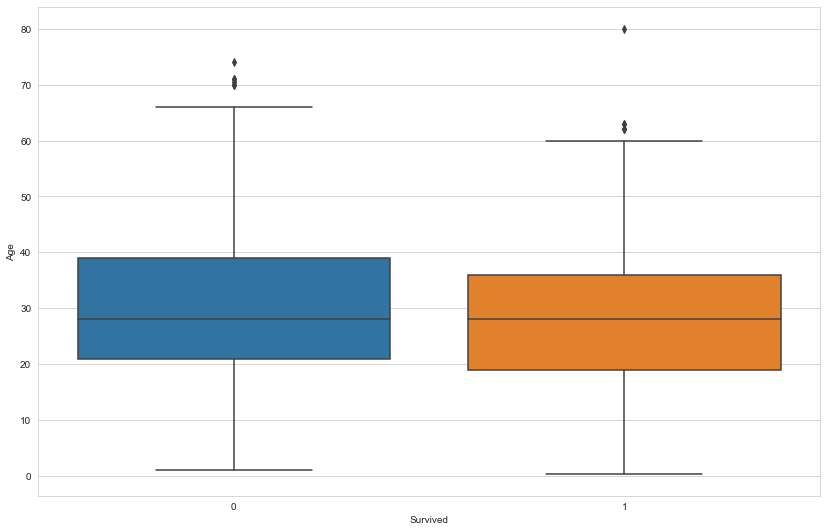

In [799]:
plt.figure(figsize=(14,9))
sns.boxplot(x='Survived', y='Age', data=train_otchet)

Ощутимых различий по возрасту не наблюдаем.

Проверим еще некоторые гипотезы о судьбах пассажиров корабля. Например: приказ капитана о спасении детей.
Создадим искусственный признак Молодость.
Если пассажиру меньше 18 лет, то будем считать его молодым, а если ему больше 50, то будем считать его старым

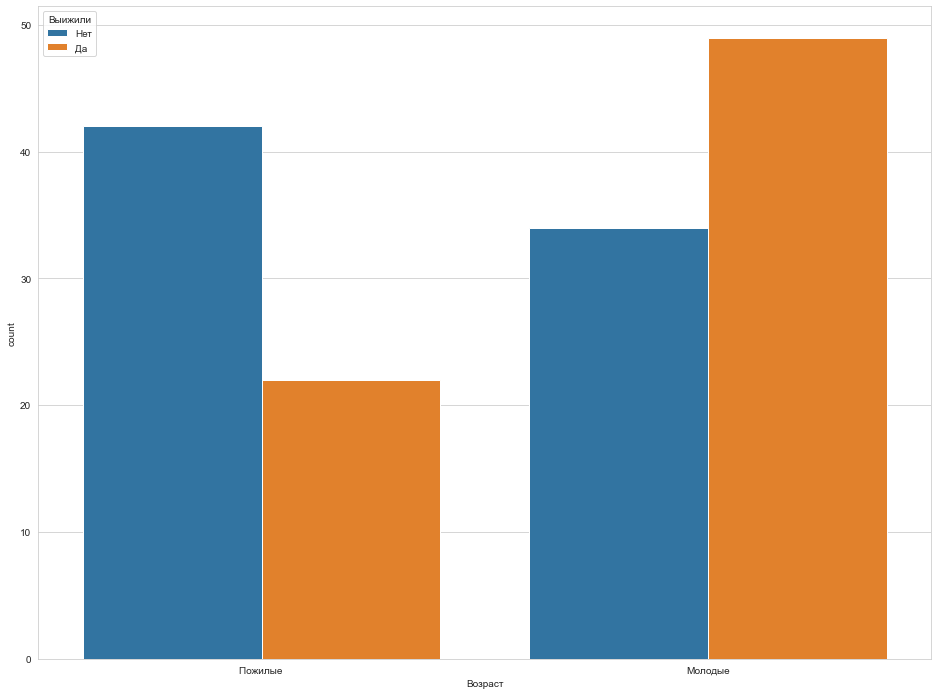

In [800]:
sub_df = train_otchet[(train_otchet['Age'] < 16) | (train_otchet['Age'] > 50)]
train_otchet['Young'] = (sub_df["Age"] < 50).astype("int64")
figure, survive_age = plt.subplots(figsize=(16, 12))
sns.countplot(x='Young', hue='Survived', data=train_otchet[(train_otchet['Young']==1) | (train_otchet['Young']==0)])
survive_age.set_xticklabels(['Пожилые ', 'Молодые'])
survive_age.set_xlabel("Возраст")
plt.legend(title='Выижили',loc='upper left', labels=['Нет','Да']);

Действительно, дети спасались чаще, чем пожилые пассажиры.
Можно сделать вывод, что возраст не особо сильный признак для построения модели и хорошо себя показывает только в частном случае, при просмотре узкой возрастной категории пассажиров.

In [209]:
train_df.drop('Young', inplace=True, axis=1)

Проведем анализ по полу в зависимости от размера семьи пассажира.

In [802]:
family_surv = train_otchet
family_surv['Family'] = family_surv['Parch'] + family_surv['SibSp']


Text(0, 0.5, 'Шанс выжить')

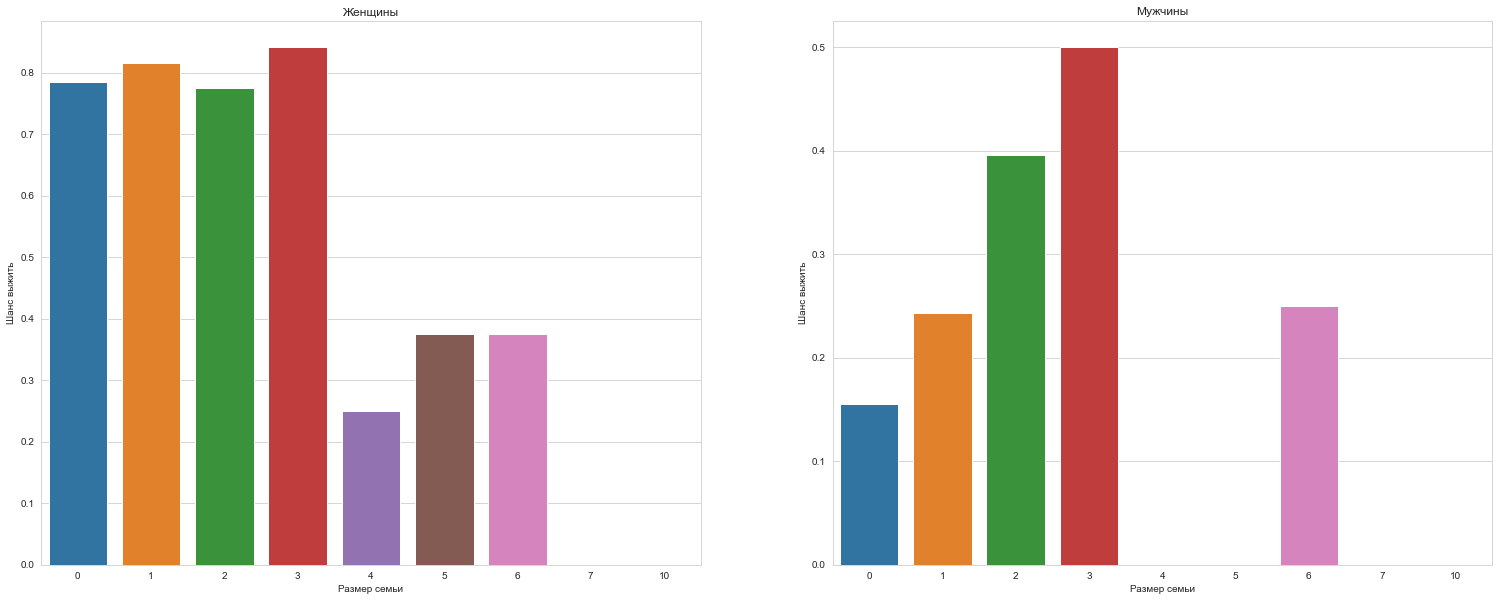

In [805]:
figure= plt.subplots(figsize=(26, 10))
plt.subplot(1, 2, 1)
sns.barplot(y='Survived', x='Family', data=family_surv[family_surv['Sex']=='female'], ci=None)
plt.xlabel('Размер семьи')
plt.title('Женщины')
plt.ylabel('Шанс выжить')
plt.subplot(1, 2, 2)
sns.barplot(y='Survived', x='Family', data=family_surv[family_surv['Sex']=='male'], ci=None)
plt.xlabel('Размер семьи')
plt.title('Мужчины')
plt.ylabel('Шанс выжить')

На графиках видно, что для женщины небольшое количество родственников существенно повышает вероятность выжить. Мужчины одиночки или путешествующие с большой семьей имеют невысокие шансы на выживание.
Статистическую значимость этих выводов проверять не будем, в дальнейшим посмотрим как этот признак будет влиять на создание модели.

Посмотрим на признак каюты пассажиров, из истории известно:

<<Когда было найдено тело стюарда салона Герберта Кейва, среди его вещей был найден неполный список пассажиров первого класса. Это единственное документальное свидетельство распределения кают на "Титанике". Список, вероятно, был составлен за несколько дней до отплытия, поскольку в него включены несколько пассажиров, которые отменили проход на "Титанике".>>

Можно предположить, что если известны номера кают у пассажиров вторых и третьих классов, то они вероятнее всего выжили, потому что смогли предоставить информацию о номере каюты.

In [806]:
sub_cabin = train_otchet[['Survived','Pclass','Sex','Cabin']]
sub_cabin['Cabin'] = sub_cabin['Cabin'].notna()
sub_cabin

,Survived,Pclass,Sex,Cabin
0,0,3,male,False
1,1,1,female,True
2,1,3,female,False
3,1,1,female,True
4,0,3,male,False
...,...,...,...,...
886,0,2,male,False
887,1,1,female,True
888,0,3,female,False
889,1,1,male,True


Text(0.5, 1.0, '3ий класс')

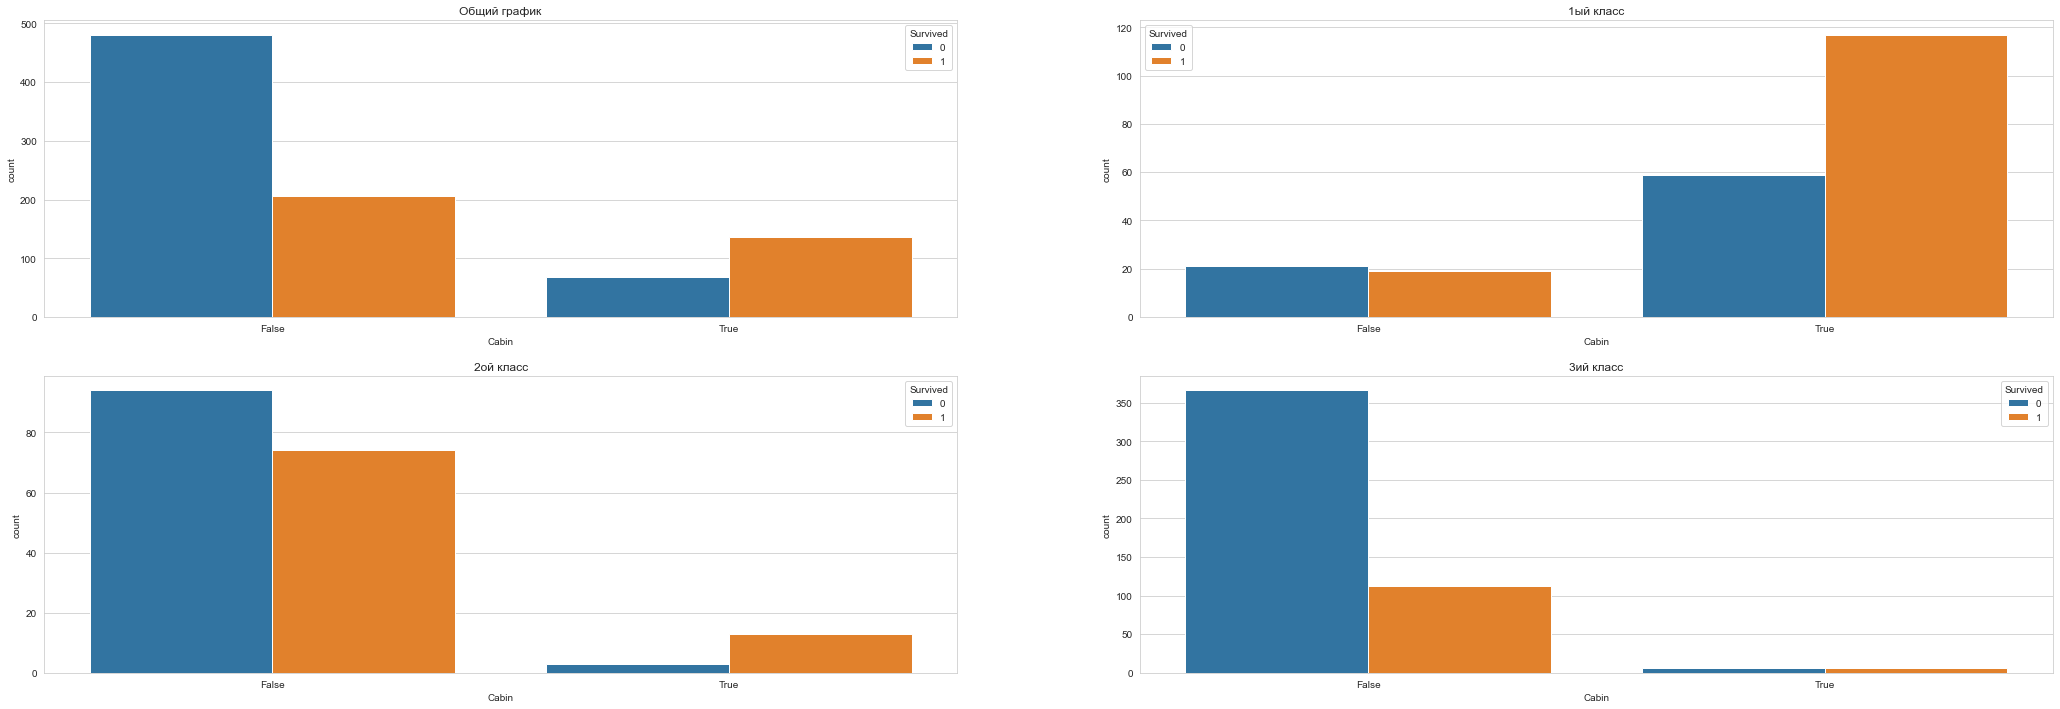

In [808]:
figure= plt.subplots(figsize=(36, 12))
plt.subplot(2,2,1)
sns.countplot(x='Cabin', hue='Survived', data=sub_cabin)
plt.title("Общий график")
plt.subplot(2,2,2)
sns.countplot(x='Cabin', hue='Survived', data=sub_cabin[sub_cabin['Pclass']==1])
plt.title("1ый класс")
plt.subplot(2,2,3)
sns.countplot(x='Cabin', hue='Survived', data=sub_cabin[sub_cabin['Pclass']==2])
plt.title("2ой класс")
plt.subplot(2,2,4)
sns.countplot(x='Cabin', hue='Survived', data=sub_cabin[sub_cabin['Pclass']==3])
plt.title("3ий класс")


Действительно, предположение подтвердилось. Наличие номера каюты положительно влияет на выживаемость пассажира.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

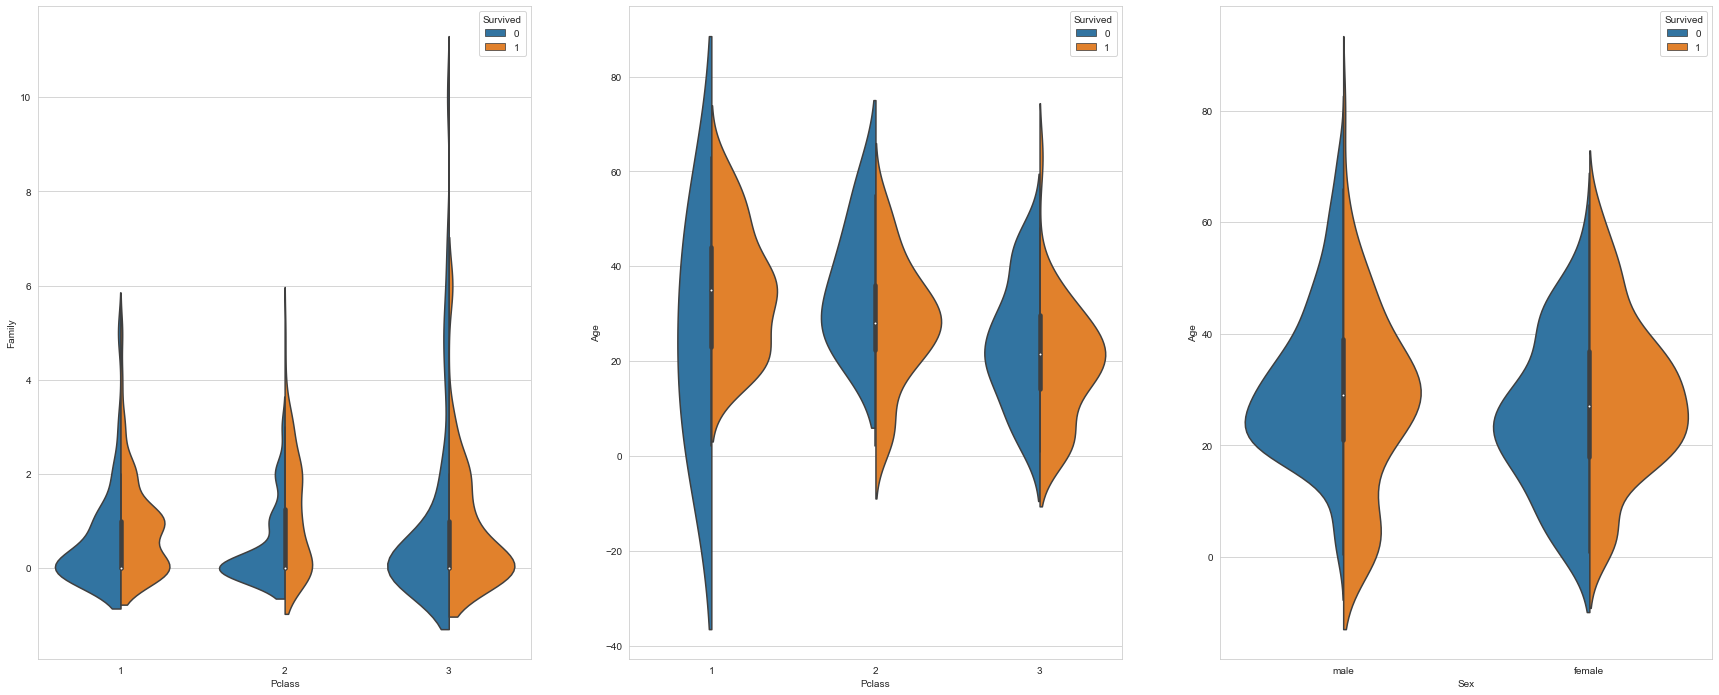

In [809]:
fig = plt.figure(figsize=(30,12))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Pclass", y="Family", hue="Survived", data=train_otchet, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_otchet[train_otchet['Sex']=='female'], split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_otchet, split=True, ax=ax3)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

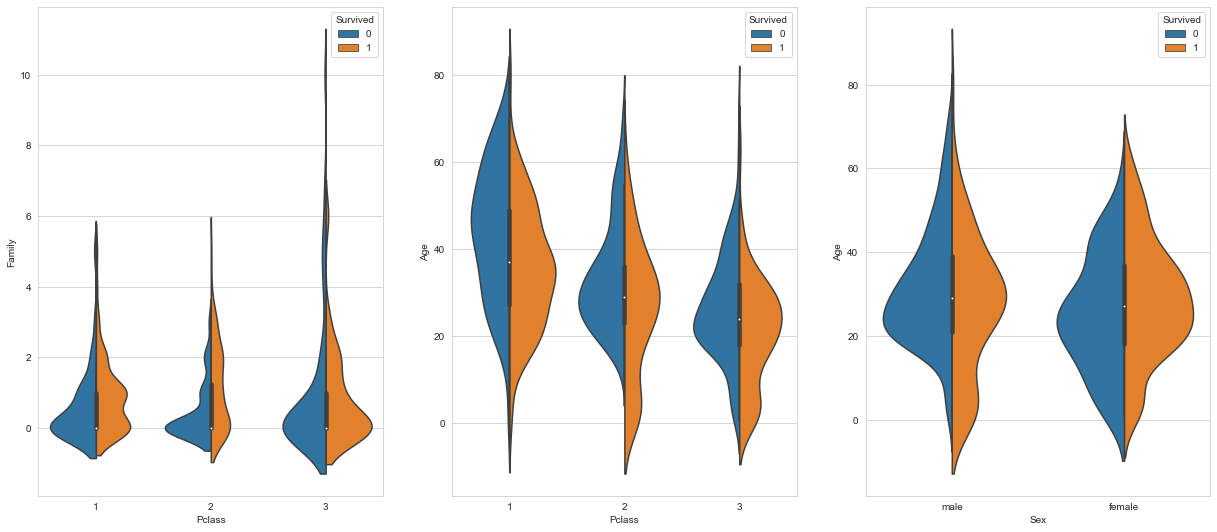

In [815]:
fig = plt.figure(figsize=(21,9))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


sns.violinplot(x="Pclass", y="Family", hue="Survived", data=train_otchet, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_otchet, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_otchet, split=True, ax=ax3)

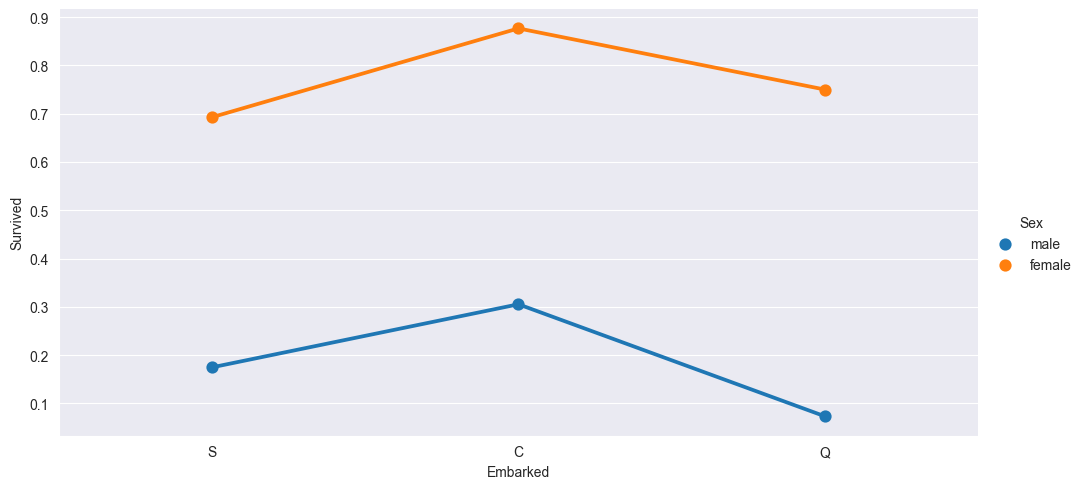

In [105]:
sns.catplot(x='Embarked', y='Survived', hue='Sex', aspect=2, data=ideal_df, kind='point', ci=None)

Ну и последнее:
Большими семьями чаще путешествовали пассажиры второго и третьего класса
Все маленькие дети из второго класса спаслись
В первом классе детей было меньше чем в двух других
Молодые люди спасались чаще пожилых во всех трех классах, особенно в первом
Большинство мальчиков спаслись

## 5) Предобработка данных и создание новых признаков

Ранее мы обращали внимание на пропущенные значения в полях возраста, каюты и порта отправления.
С портом отправления все просто, в пропущенные значения подставим S, т.к в этом порту зашло больше всего пассажиров.

С возрастом немного сложнее. Я предлагаю пропущенные значения заменить на средние по классу билета, полу пассажира и обращению к нему(Miss, Mr, Master и тп).

Ну и с каютой все намного сложнее. Есть два варианта: преобразовать признак к бинарному виду (есть/ нет номера), либо вытащить номер палубы из значений, где они есть.

В отложенной выборке также отсутствовало одно значение стоимости билета, возьмем среднюю стоимость по классу и полу

In [41]:
train_df = pd.read_csv('train.csv', delimiter=',')
test_df = pd.read_csv('test.csv', delimiter=',')

In [819]:
train_otchet.groupby(['Sex', 'Pclass', 'Title'])['Age'].agg(np.mean)

Sex     Pclass  Title 
female  1       Miss      29.744681
                Mrs       40.400000
                Other     43.333333
        2       Miss      22.560606
                Mrs       33.682927
        3       Miss      16.123188
                Mrs       33.515152
male    1       Master     5.306667
                Mr        41.580460
                Other     48.727273
        2       Master     2.258889
                Mr        32.768293
                Other     42.000000
        3       Master     5.350833
                Mr        28.724891
Name: Age, dtype: float64

In [817]:
test_df.groupby(['Sex', 'Pclass', 'Title'])['Age'].agg(np.mean)

Sex  Pclass  Title
0    1       0        31.428571
             1        45.606061
             4        39.000000
     2       0        17.370000
             1        33.000000
     3       0        19.872647
             1        29.875000
1    1       2         9.500000
             3        41.200000
             4        51.000000
     2       2         5.000000
             3        31.718182
             4        35.500000
     3       2         7.454615
             3        27.198795
Name: Age, dtype: float64

Перед тем как заменять возраст на среднее проверим, влияет ли его отсутствие на выживаемость. Создадим новый бинарный признак, отвечающий за наличие возраста, где 0 - отсутствует, 1 - присутствует.

In [60]:
train_df.groupby(['Age_NaN']) ['Survived'].value_counts(normalize=True)

Age_NaN  Survived
0        0           0.593838
         1           0.406162
1        0           0.706215
         1           0.293785
Name: Survived, dtype: float64

Как видно, пассажиры у которых отсутствует возраст погибали в 70% случаях. Ну и смертность пассажиров с присутствием возраста примерно равна общей (62% на 38%). Предлагаю сохранить этот признак, возможно он будет влиять на эффективность модели.

Может показаться, что я сейчас буду просто так создавать кучу новых признаков, забыв о проклятье размерности, но это не так. В дальнейшем, я воспользуюсь инструментом по подбору наилучших признаков для обучения модели, поэтому считаю, что пока можно выделять сколько угодно заметные закономерности и создавать на их основе новые признаки. Мы всегда сможем их выкинуть за ненадобностью, а вот пропустив како-нибудь значимый параметр, можем пожертвовать качеством обучения.

Аналогичную операцию проведем для номера каюты, в предыдущем пункте, мы уже наблюдали влияние наличия этого признака на выживаемость. Введем бинарный признак присутствие номера каюты.

Также введем бинарные признаки "молодость", где 1 - пассажиру меньше 16 лет и "старость", где 1 - пассажиру больше 50.

Предлагаю еще ввести признак "путешествует один", ранее мы замечали скундные шансы на выживание у мужчин одиночек.

Рассмотрев подробнее колонку имен пассажиров, можем заметить там обращения Master, Ms, Col, Cap и т.д. Так например: начале 20 века мастер было обращением к мальчикам, а мисс к незамужним женщинам - предлагаю избавиться от колонки имен и создать новый признак "обращение", что поможет нам в определении среднего возраста. Возьмем наиболее часто встречаемые обращения, а Don, Col, Dr и другие объединим в обращение "Другое".


In [818]:
train_test_df = [train_otchet, test_otchet]
for ds in train_test_df:
    ds['Cab_nan'] = np.where(ds['Cabin'].isnull(), 1,0)
    ds['Age_NaN'] = np.where(ds['Age'].isnull(), 1,0)
    ds['Young'] = (ds['Age'] < 16).astype('int64')
    ds['Old'] = (ds['Age'] > 50).astype('int64')
    ds['Family'] = ds['Parch'] + ds['SibSp']
    ds['Title'] = ds.Name.str.extract('([A-Za-z]+)\.')
    ds['Title'] = ds['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    ds['Title'] = ds['Title'].replace('Mlle', 'Miss')
    ds['Title'] = ds['Title'].replace('Ms', 'Miss')
    ds['Title'] = ds['Title'].replace('Mme', 'Mrs')
    ds['Alone'] = (ds['Family'] < 1).astype('int64')

In [430]:
for ds in train_test_df:
    ds['Age'] = ds['Age'].fillna(ds.groupby(['Sex', 'Pclass', 'Title'])['Age'].transform('mean'))


In [438]:
for ds in train_test_df:
    ds['Cabin'] = ds.Cabin.str.extract('([A-Za-z]+)?')
    ds.drop(columns=['Name', 'Ticket'], axis=1, inplace=True)

In [441]:
ideal_df = train_df.copy()
ideal_test = test_df.copy()

In [440]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cab_nan,Age_NaN,Young,Old,Family,Title,Alone
0,892,3,male,34.500000,0,0,7.8292,NaN,Q,1,0,0,0,0,Mr,1
1,893,3,female,47.000000,1,0,7.0000,NaN,S,1,0,0,0,1,Mrs,0
2,894,2,male,62.000000,0,0,9.6875,NaN,Q,1,0,0,1,0,Mr,1
3,895,3,male,27.000000,0,0,8.6625,NaN,S,1,0,0,0,0,Mr,1
4,896,3,female,22.000000,1,1,12.2875,NaN,S,1,0,0,0,2,Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.198795,0,0,8.0500,NaN,S,1,1,0,0,0,Mr,1
414,1306,1,female,39.000000,0,0,108.9000,C,C,0,0,0,0,0,Other,1
415,1307,3,male,38.500000,0,0,7.2500,NaN,S,1,0,0,0,0,Mr,1
416,1308,3,male,27.198795,0,0,8.0500,NaN,S,1,1,0,0,0,Mr,1


Так как большинство алгоритмов работают только с числами, нам придется переводить признаки в числовые: категориальные или бинарные.

Перед тем как это делать, стоит разобраться, как это повлияет на обучение. Категориальные признаки не увеличивают количество признаков, однако делают признак "шире", что может сказаться на геометрических методах, бинарные же наоборот увеличивают размерность пространства при бинарном значении признака да/нет. В таком случае для успешного обучения может потребоваться больше данных.

Я предлагаю остановиться на категориальных признаках. Во-первых, чтобы легче визуализировать признаки и меньше работать с данными, а во-вторых, чтобы еще больше не утяжелять отчет.

Переведем некоторые признаки в бинарные и категориальные.
1) Для пола примем 0- женщина, 1- мужчина
2) Для  Embarked порядок следования корабля: S-1 ,C-2, Q-3
3) Для палубы: 0- Номер отсутствует, A-1, B-2, C-3, D-4, E-5, F-6, G-7, T-8
4) Для обращения: Miss- 0, Mrs- 1, Master- 2, Mr- 3, Other - 4

In [442]:
for ds in train_test_df:
    ds['Sex'] = ds['Sex'].map({'male': 1, 'female': 0})
    ds['Embarked'] = ds['Embarked'].map({'S': 1, 'C': 2, 'Q':3})
    ds['Cabin'] = ds['Cabin'].map({np.NaN: 0, 'A': 1, 'B': 2, 'C': 3, 'D':  4, 'E': 5, 'F': 6, 'G': 7, 'T': 8})
    ds['Title'] = ds['Title'].map({'Miss': 0, 'Mrs': 1, 'Master': 2, 'Mr': 3, 'Other': 4})

In [446]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cab_nan,Age_NaN,Young,Old,Family,Title,Alone
0,1,0,3,1,22.000000,1,0,7.2500,0,1.0,1,0,0,0,1,3,0
1,2,1,1,0,38.000000,1,0,71.2833,3,2.0,0,0,0,0,1,1,0
2,3,1,3,0,26.000000,0,0,7.9250,0,1.0,1,0,0,0,0,0,1
3,4,1,1,0,35.000000,1,0,53.1000,3,1.0,0,0,0,0,1,1,0
4,5,0,3,1,35.000000,0,0,8.0500,0,1.0,1,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0,1.0,1,0,0,0,0,4,1
887,888,1,1,0,19.000000,0,0,30.0000,2,1.0,0,0,0,0,0,0,1
888,889,0,3,0,16.123188,1,2,23.4500,0,1.0,1,1,0,0,3,0,0
889,890,1,1,1,26.000000,0,0,30.0000,3,2.0,0,0,0,0,0,3,1


<AxesSubplot: >

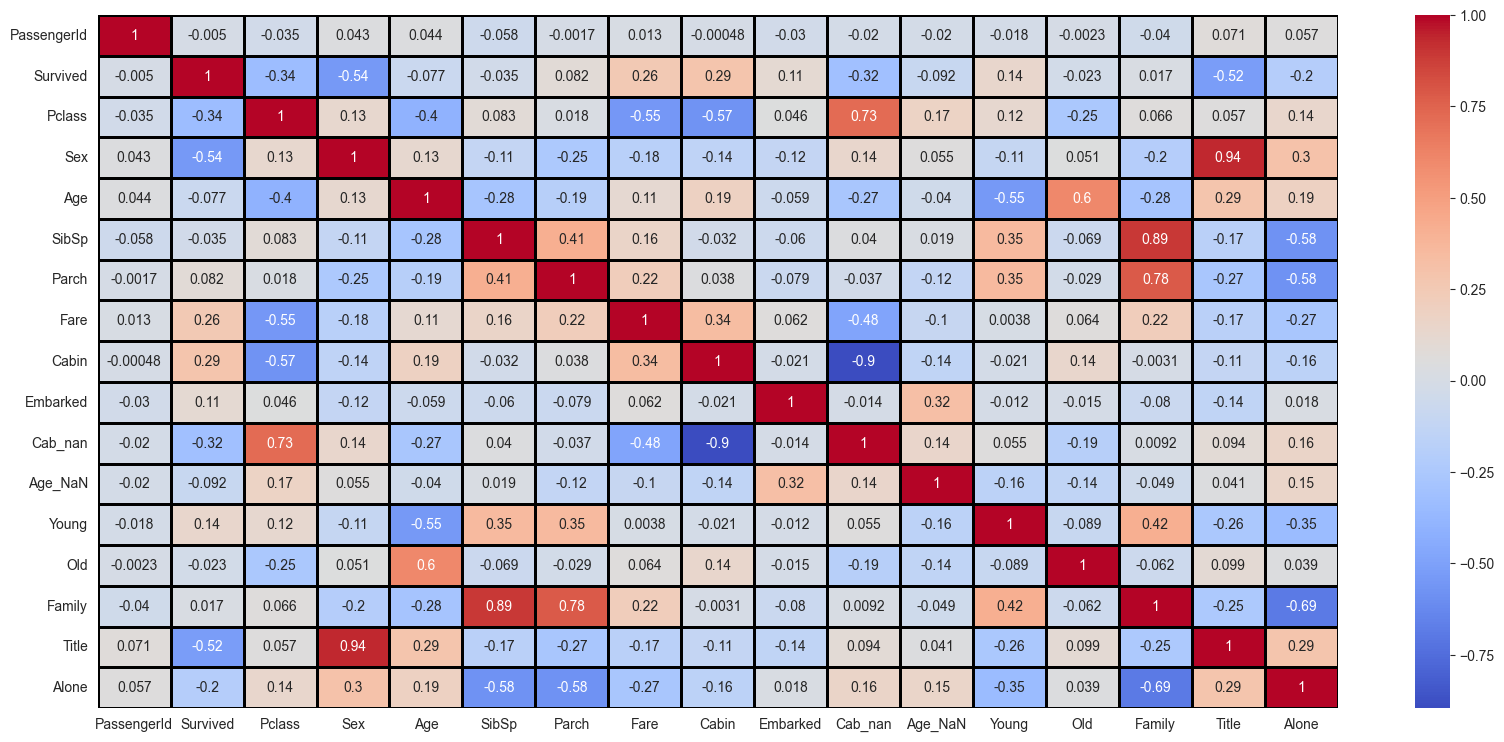

In [111]:
plt.figure(figsize=(20, 9))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidths=1, linecolor='black')


In [469]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline


## 7) Кросс валидация, подбор параметров

Для проведения исследования я выбрал следующие методы:
1) Метод стохастического градиентного спуска
2) Метод логистической регрессии
3) Метод случайного леса
4) Метод К-ближайших соседей
5) Наивный байесовский метод
6) Метод опорных векторов
7) Метод xgboost

Для выбора наиболее информативных признаков буду использовать стратифицированную кросс-валидацию и следующие методы:
 1) Метод фильтрации SelectKBest.
Метод оценивают взаимосвязь предикторов с целевой переменной используя статистические тесты, позволяя отобрать соответственно заданное количество и долю наилучших по заданному критерию признаков. В качестве статистических тестов будем использовать F-тест. F-тест оценивает степень линейной зависимости между предикторами и целевой переменной, соответственно он лучше всего подходит для линейных моделей.
2) Взаимную информацию
Взаимная информация показывает насколько чётко определена целевая переменная если известны значения предиктора. Этот тип тестов считается самым удобным в использовании - он хорошо работает "из коробки" и позволяет находить нелинейные зависимости.

Для выбора параметров модели буду использовать стратифицированную и метод GridSearchCV


In [822]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Cab_nan', 'Age_NaN', 'Young', 'Old',
       'Family', 'Title', 'Alone']

Text(0.5, 1.0, 'SelectKBest')

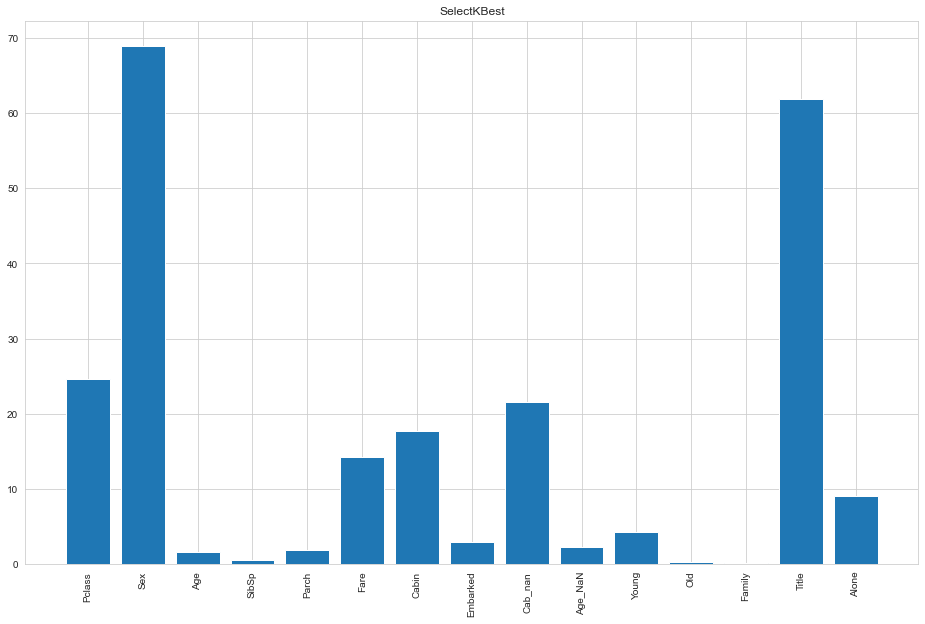

In [828]:

selector = SelectKBest(f_classif, k=5)
selector.fit(X[predictors], y)

scores = -np.log10(selector.pvalues_)
plt.figure(figsize=(16,10))
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.title('SelectKBest')



Метод SelectKBest наиболее важными посчитал: пол, обращение, класс, наличие записи о каюте, номер палубы, стоимость билета и одиночку.

In [465]:
def plot_features_scores(model, data, target, column_names, model_type):
    '''Функция для визуализации важности признаков'''

    model.fit(data, target)

    if model_type == 'rf':
        (pd.DataFrame(data={'score': model['rf'].feature_importances_},
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False));
    elif model_type == 'lr':
        (pd.DataFrame(data={'score': model['lr'].coef_[0]},
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False));

    else:
        raise KeyError('Unknown model_type')

In [825]:
X = X.fillna(X.mean())


In [821]:
X = train_df.copy()
y = X.pop("Survived")

scores = [0.85500659 0.89064171 0.85314171 0.86283422 0.88598591] 
mean score = 0.86952 +/- 0.01575


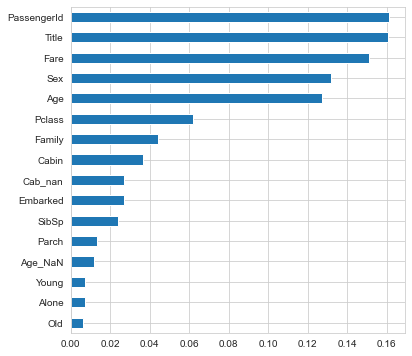

In [829]:
X = X.fillna(X.mean())
SEED = 1
rf = Pipeline([('rf', RandomForestClassifier(n_jobs=-1,
                                             class_weight='balanced',
                                             random_state=SEED))])

# параметры кросс-валидации (стратифицированная 5-фолдовая с перемешиванием)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

scores = cross_val_score(estimator=rf, X=X, y=y,
                         cv=skf, scoring='roc_auc', n_jobs=-1)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores, scores.mean(), scores.std()))

# важность признаков

plot_features_scores(model=rf, data=X, target=y, column_names=X.columns, model_type='rf')

Для метода случайного утверждает о важности: обращения, стоимости билета, пола, возраста, класса, размера семьи, номера палубы, наличие номера каюты и порт отправления.

Text(0.5, 1.0, 'Mutual Information Scores Regression')

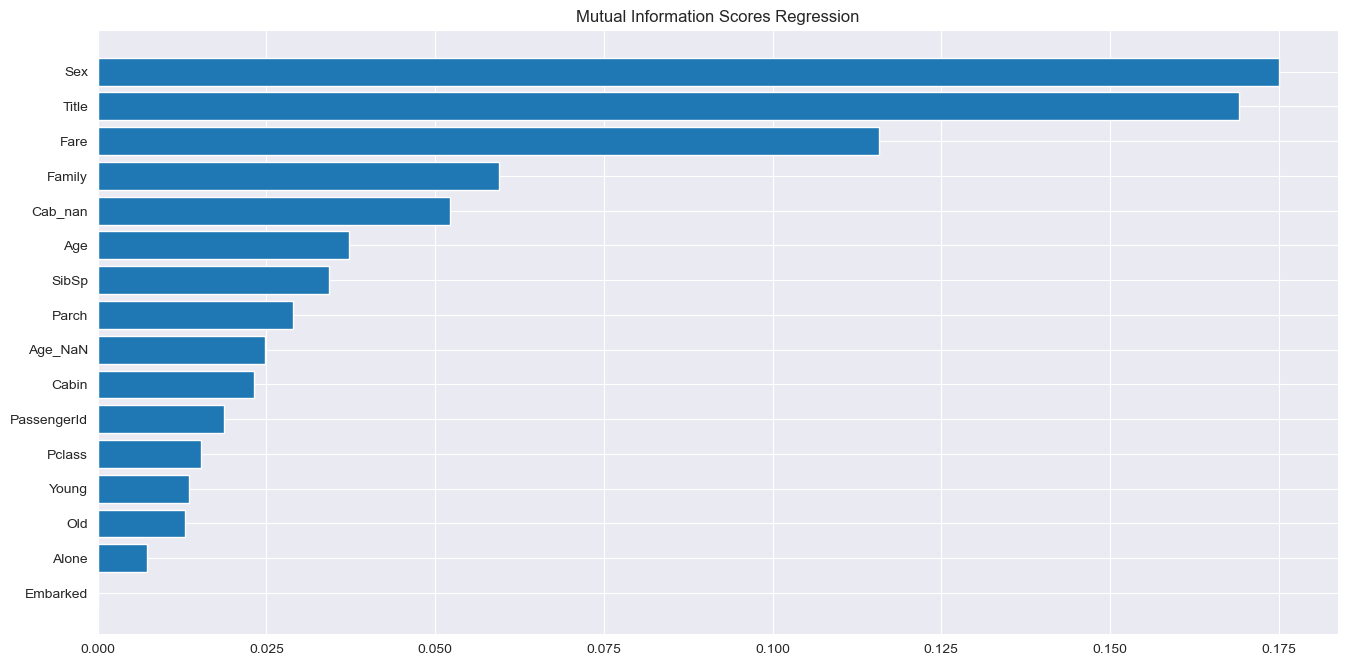

In [485]:
'''for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

X = X.fillna(X.mean())
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(16, 8))
plot_mi_scores(mi_scores)
plt.title('Mutual Information Scores Regression')
'''

Text(0.5, 1.0, 'Mutual Information Scores Classifier')

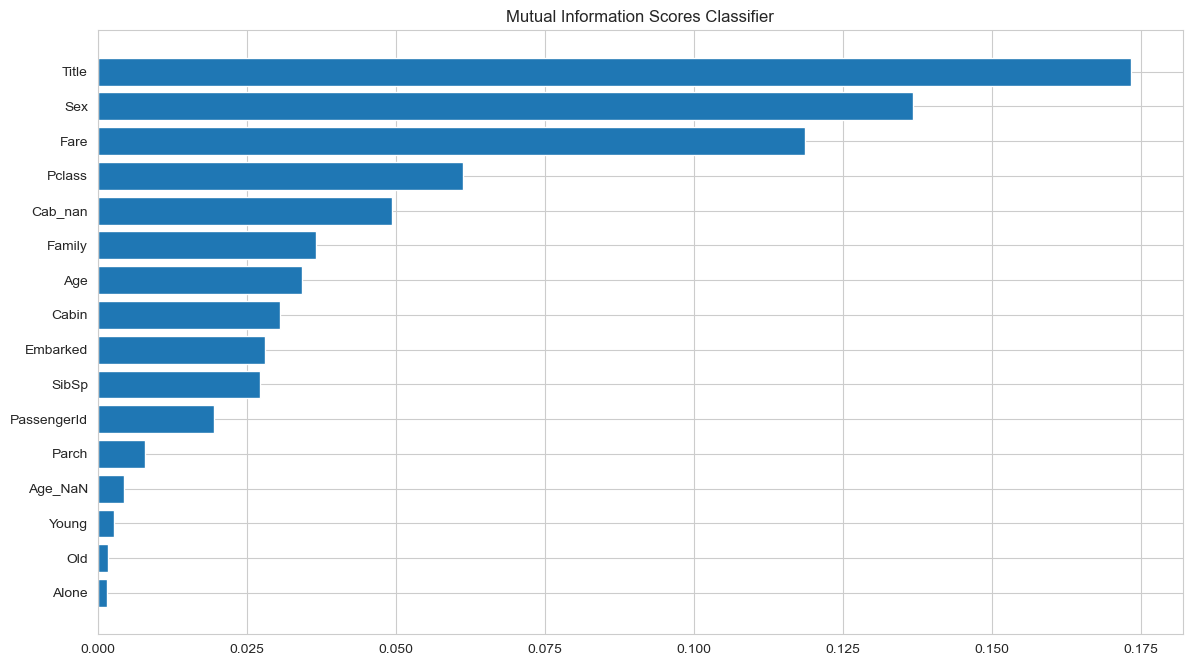

In [833]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

X = X.fillna(X.mean())
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(14, 8))
plot_mi_scores(mi_scores)
plt.title('Mutual Information Scores Classifier')


По методу взаимной информации важными признаками были выделены: обращение, пол, стоимость билета, размер семьи, класс, возраст, номер палубы, наличие записи о каюте, одиночка

In [504]:
priznaki = ['Sex', 'Pclass', 'Title', 'Cab_nan', 'Cabin', 'Fare', 'Alone', 'Family','Age']


Оба метода выделили важность пола, обращения, класса, наличия записи о каюте, номер палубы, стоимость билета и одиночку. Взаимная информация еще указала на размер семьи и возраст.
В дальнейшем предлагаю обучать модели на этих признаках.

Также, к каждой из 6 моделей были подобраны наилучшие параметры обучения с помощью GridSearchCV. Чтобы не утяжелять отчет, я не буду приводить здесь эти выкладки.

In [523]:
clf = RandomForestClassifier()
parameters = {'n_estimators': [500, 550, 600, 650, 700, 750, 800],
              'min_samples_leaf': [2, 3, 4],
              'min_samples_split': [10, 11, 12, 13, 14]}
grid = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
grid.fit(X[priznaki], y)
alg_promezh = (grid.best_estimator_, grid.best_score_)
print("Accuracy (random forest auto): {} with params {}"
      .format(grid.best_score_, grid.best_params_))

Accuracy (random forest auto): 0.8406377502981608 with params {'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 650}


Accuracy (random forest auto): 0.8361559224154165 with params {'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 500}


In [536]:
clf = LogisticRegression()
parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': np.logspace(-3, 3, 7),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': range(100, 201, 10)}
grid = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
grid.fit(X[priznaki], y)
lg_reg_promezh = (grid.best_score_, grid.best_params_)
print(lg_reg_promezh)

(0.8036155922415418, {'C': 100.0, 'max_iter': 120, 'penalty': 'l2', 'solver': 'lbfgs'})


C:\Users\Zloy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3465 fits failed out of a total of 7700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
385 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zloy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zloy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Zloy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

In [570]:
log_reg_params

(0.8036155922415418,
 {'C': 100.0, 'max_iter': 120, 'penalty': 'l2', 'solver': 'lbfgs'})

In [571]:
les_params

(RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                        n_estimators=650),
 0.8406377502981608)

In [847]:
clf = SGDClassifier()
parameters = {
       'alpha' : np.linspace(0.00001, 0.0001, 15),
       'learning_rate': ['optimal', 'constant', 'invscaling'],
       'eta0' : np.linspace(0.00001, 0.0001, 15),
       'max_iter' : np.arange(5,14),
   }
grid = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
grid.fit(X[priznaki], y)
sgdcclass = (grid.best_score_, grid.best_params_)
print(sgdcclass)

(0.7687966857071119, {'alpha': 8.714285714285714e-05, 'eta0': 7.428571428571429e-05, 'learning_rate': 'optimal', 'max_iter': 10})


In [551]:
sgdc_params = sgdcclass

In [553]:
clf = KNeighborsClassifier()
parameters = {'n_neighbors': range(1, 10),  # Number of neighbors to use
              'weights': ['uniform', 'distance'],  # Weight function used in prediction
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
              'metric': ['minkowski', 'euclidean', 'cityblock', 'chebyshev']}  # The distance metric to use for the tree
grid = GridSearchCV(clf, parameters, cv=5, n_jobs=-1 )
grid.fit(X[priznaki], y)
sosediparams = (grid.best_score_, grid.best_params_)
print(sosediparams)(0.7688029627769757, {'algorithm': 'ball_tree', 'metric': 'cityblock', 'n_neighbors': 3, 'weights': 'uniform'})

(0.7688029627769757, {'algorithm': 'ball_tree', 'metric': 'cityblock', 'n_neighbors': 3, 'weights': 'uniform'})


In [555]:
sosedi_params = sosediparams


In [556]:
alg_nbs = GaussianNB()
scores = cross_val_score(alg_nbs, X[priznaki], y, cv=5, n_jobs=-1)
print("Accuracy (naive bayes): {}/{}".format(scores.mean(), scores.std()))

Accuracy (naive bayes): 0.7778105580315109/0.03242264024076422


In [559]:
alg_svm = SVC(C=1.0)
scores = cross_val_score(alg_svm, X[priznaki], y, cv=5, n_jobs=-1)
print("Accuracy (svm): {}/{}".format(scores.mean(), scores.std()))

Accuracy (svm): 0.6757516791161886/0.04810032421362173


In [561]:
import xgboost as xgb

In [568]:
ald_xgb_model = xgb.XGBClassifier()
ald_xgb_params = [
    {"n_estimators": [300, 330, 350, 370],
     "max_depth": [1, 2, 4, 5],
     "learning_rate": [0.01, 0.02, 0.05, 0.07, 0.1]}
]
alg_xgb_grid = GridSearchCV(ald_xgb_model, ald_xgb_params, cv=5, refit=True, verbose=1, n_jobs=1)
alg_xgb_grid.fit(X[priznaki], y)
alg_xgb_best = alg_xgb_grid.best_estimator_
print("Accuracy (xgboost auto): {} with params {}"
      .format(alg_xgb_grid.best_score_, alg_xgb_grid.best_params_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Accuracy (xgboost auto): 0.8462494507563869 with params {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 330}


In [691]:
ald_xgb_model = xgb.XGBClassifier()
ald_xgb_params = [
    {"n_estimators": [350, 370, 400, 430, 460],
     "max_depth": [1, 2, 4, 5],
     "learning_rate": [0.01, 0.02, 0.05, 0.07, 0.1]}
]
alg_xgb_grid = GridSearchCV(ald_xgb_model, ald_xgb_params, cv=5, refit=True, verbose=1, n_jobs=1)
alg_xgb_grid.fit(cheat[priznaki], cheat.Survived)
alg_xgb_best_cheat = alg_xgb_grid.best_estimator_
print("Accuracy (xgboost auto): {} with params {}"
      .format(alg_xgb_grid.best_score_, alg_xgb_grid.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy (xgboost auto): 0.8694364013921791 with params {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 370}


In [566]:
alg_xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=270, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [569]:
sgdc_params

(0.7710313225786203,
 {'alpha': 7.428571428571429e-05,
  'eta0': 6.142857142857143e-05,
  'learning_rate': 'optimal',
  'max_iter': 13})

In [572]:
sosedi_params

(0.7688029627769757,
 {'algorithm': 'ball_tree',
  'metric': 'cityblock',
  'n_neighbors': 3,
  'weights': 'uniform'})

In [582]:
params_tab = {'Метод': ['Метод стохастического градиентного спуска', 'Метод логистической регрессии', 'Метод случайного леса', 'Метод К-ближайших соседей', 'Наивный байесовский метод', 'Метод опорных векторов', 'Метод xgboost'],
              'Accuracy ': [0.771, 0.804,0.841,0.769,0.778,0.676,0.846]}
pd.DataFrame(params_tab)

,Метод,Accuracy
0,Метод стохастического градиентного спуска,0.771
1,Метод логистической регрессии,0.804
2,Метод случайного леса,0.841
3,Метод К-ближайших соседей,0.769
4,Наивный байесовский метод,0.778
5,Метод опорных векторов,0.676
6,Метод xgboost,0.846


Наиболее точными алгоритмами оказались: xgboost и случайный лес. Воспользуемся ими для проведения классификации.

## 8) Прогноз для тестовой и отложенной выборки

In [618]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cab_nan,Age_NaN,Young,Old,Family,Title,Alone
0,1,0,3,1,22.000000,1,0,7.2500,0,1.0,1,0,0,0,1,3,0
1,2,1,1,0,38.000000,1,0,71.2833,3,2.0,0,0,0,0,1,1,0
2,3,1,3,0,26.000000,0,0,7.9250,0,1.0,1,0,0,0,0,0,1
3,4,1,1,0,35.000000,1,0,53.1000,3,1.0,0,0,0,0,1,1,0
4,5,0,3,1,35.000000,0,0,8.0500,0,1.0,1,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0,1.0,1,0,0,0,0,4,1
887,888,1,1,0,19.000000,0,0,30.0000,2,1.0,0,0,0,0,0,0,1
888,889,0,3,0,16.123188,1,2,23.4500,0,1.0,1,1,0,0,3,0,0
889,890,1,1,1,26.000000,0,0,30.0000,3,2.0,0,0,0,0,0,3,1


In [645]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        418 non-null    int64  
 8   Embarked     418 non-null    int64  
 9   Cab_nan      418 non-null    int32  
 10  Age_NaN      418 non-null    int32  
 11  Young        418 non-null    int64  
 12  Old          418 non-null    int64  
 13  Family       418 non-null    int64  
 14  Title        418 non-null    int64  
 15  Alone        418 non-null    int64  
 16  Survived     418 non-null    int64  
dtypes: float64(2), int32(2), int64(13)
memory usage: 55.5 KB


In [627]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

X = X[priznaki]
kfold = KFold(n_splits=5, shuffle=True, random_state=110)
acc_score = []
recl_score = []
prec_score = []
f_score = []
for train, test in kfold.split(train_df):
    print(train)
    print(test)


[  0   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  20
  21  22  24  25  27  28  29  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  48  50  51  52  54  55  56  57  60  61  62  64  65  66
  67  68  69  70  71  72  73  75  76  78  79  80  81  83  85  86  87  88
  89  91  93  95  96  97  99 100 101 102 104 106 107 108 109 110 112 113
 115 117 118 120 121 123 125 126 127 128 129 130 132 133 134 135 138 139
 140 141 142 143 144 146 148 149 150 151 152 154 155 156 157 158 159 160
 161 162 163 164 165 168 169 170 171 172 173 174 175 177 178 179 180 181
 182 183 185 188 189 190 191 192 193 194 196 197 198 199 200 202 203 205
 206 207 208 210 212 213 215 216 217 219 221 222 225 226 227 228 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 245 246 247 248 249 250
 251 252 254 256 258 259 260 261 263 264 265 266 267 269 271 272 273 275
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 293 294 295
 296 297 298 300 301 302 303 304 306 307 308 309 31

1    1
2    1
3    1
4    0
5    0
6    0
Name: Survived, dtype: int64

In [640]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

X = X[priznaki]
kfold = KFold(n_splits=5, shuffle=True, random_state=110)
acc_score = []
recl_score = []
prec_score = []
f_score = []
for train, test in kfold.split(train_df):
    les_clf = RandomForestClassifier(min_samples_leaf=2, min_samples_split=10, n_estimators=650)
    les_clf.fit(X.iloc[train, :], y.iloc[train, ])
    les_predict = les_clf.predict(X.iloc[test, :])
    acc_score.append(float(accuracy_score(les_predict, y.iloc[test, ])))
    recl_score.append(float(recall_score(les_predict, y.iloc[test, ], average="macro")))
    prec_score.append(float(precision_score(les_predict, y.iloc[test, ], average="macro")))
    f_score.append(float(f1_score(les_predict, y.iloc[test, ], average="macro")))
ocenki = {'Оценки качества': ['acc_score','recl_score','prec_score','f_score',], 'Значения':[round(np.array(acc_score).mean(), 5), round(np.array(recl_score).mean(), 5), round(np.array(prec_score).mean(), 5), round(np.array(f_score).mean(), 5)]}
pd.DataFrame(ocenki)


,Оценки качества,Значения
0,acc_score,0.82491
1,recl_score,0.82169
2,prec_score,0.80352
3,f_score,0.80905


In [724]:
acc_score = []
recl_score = []
prec_score = []
f_score = []
for train, test in kfold.split(train_df):
    xgb_clf = xgb.XGBClassifier(learning_rate=0.07, max_depth=4, n_estimators=330)
    xgb_clf.fit(X.iloc[train, :], y.iloc[train, ])
    xgb_predict = xgb_clf.predict(X.iloc[test, :])
    acc_score.append(float(accuracy_score(xgb_predict, y.iloc[test, ])))
    recl_score.append(float(recall_score(xgb_predict, y.iloc[test, ], average="macro")))
    prec_score.append(float(precision_score(xgb_predict, y.iloc[test, ], average="macro")))
    f_score.append(float(f1_score(xgb_predict, y.iloc[test, ], average="macro")))
ocenkii = {'Оценки качества': ['acc_score','recl_score','prec_score','f_score',], 'Значения':[round(np.array(acc_score).mean(), 5), round(np.array(recl_score).mean(), 5), round(np.array(prec_score).mean(), 5), round(np.array(f_score).mean(), 5)]}
pd.DataFrame(ocenkii)

,Оценки качества,Значения
0,acc_score,0.83501
1,recl_score,0.82942
2,prec_score,0.81921
3,f_score,0.82209


In [838]:
acc_score = []
recl_score = []
prec_score = []
f_score = []
for train, test in kfold.split(train_df):
    xgb_clf = LogisticRegression()
    xgb_clf.fit(X.iloc[train, :], y.iloc[train, ])
    xgb_predict = xgb_clf.predict(X.iloc[test, :])
    acc_score.append(float(accuracy_score(xgb_predict, y.iloc[test, ])))
    recl_score.append(float(recall_score(xgb_predict, y.iloc[test, ], average="macro")))
    prec_score.append(float(precision_score(xgb_predict, y.iloc[test, ], average="macro")))
    f_score.append(float(f1_score(xgb_predict, y.iloc[test, ], average="macro")))
ocenkii = {'Оценки качества': ['acc_score','recl_score','prec_score','f_score',], 'Значения':[round(np.array(acc_score).mean(), 5), round(np.array(recl_score).mean(), 5), round(np.array(prec_score).mean(), 5), round(np.array(f_score).mean(), 5)]}
pd.DataFrame(ocenkii)

TypeError: fit() missing 1 required positional argument: 'y'

In [851]:
acc_score = []
recl_score = []
prec_score = []
f_score = []
for train, test in kfold.split(test_df):
    xgb_clf = SGDClassifier(alpha=8.714285714285714e-05, eta0=7.428571428571429e-05, learning_rate='optimal', max_iter=10)
    xgb_clf.fit(X[priznaki].iloc[train, :], y.iloc[train, ])
    xgb_predict = xgb_clf.predict(test_df[priznaki].iloc[test, :])
    acc_score.append(float(accuracy_score(xgb_predict, y.iloc[test, ])))
    recl_score.append(float(recall_score(xgb_predict, y.iloc[test, ], average="macro")))
    prec_score.append(float(precision_score(xgb_predict, y.iloc[test, ], average="macro")))
    f_score.append(float(f1_score(xgb_predict, y.iloc[test, ], average="macro")))
ocenkii = {'Оценки качества': ['acc_score','recl_score','prec_score','f_score',], 'Значения':[round(np.array(acc_score).mean(), 5), round(np.array(recl_score).mean(), 5), round(np.array(prec_score).mean(), 5), round(np.array(f_score).mean(), 5)]}
pd.DataFrame(ocenkii)

,Оценки качества,Значения
0,acc_score,0.55972
1,recl_score,0.38874
2,prec_score,0.47918
3,f_score,0.40617


построение кривой валидации

In [721]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

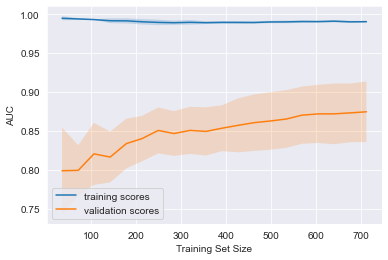

In [738]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(degree=2, n=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)),
    ('sgd_logit', RandomForestClassifier(min_samples_leaf=2, min_samples_split=n, n_estimators=650, n_jobs=-1))])
    N_train, val_train, val_test = learning_curve(logit_pipe,
    X, y, train_sizes=train_sizes, cv=5,
    scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('AUC')
    plt.legend()

plot_learning_curve(degree=2, n=3)

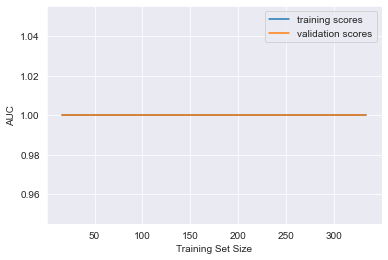

In [731]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

def plot_learning_curve(degree=2, n=300):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)),
    ('sgd_logit', xgb.XGBClassifier(learning_rate=0.07, max_depth=n, n_estimators=650, n_jobs=-1))])
    N_train, val_train, val_test = learning_curve(logit_pipe,
    X, y, train_sizes=train_sizes, cv=5,
    scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('AUC')
    plt.legend()

plot_learning_curve(degree=2, n=10)

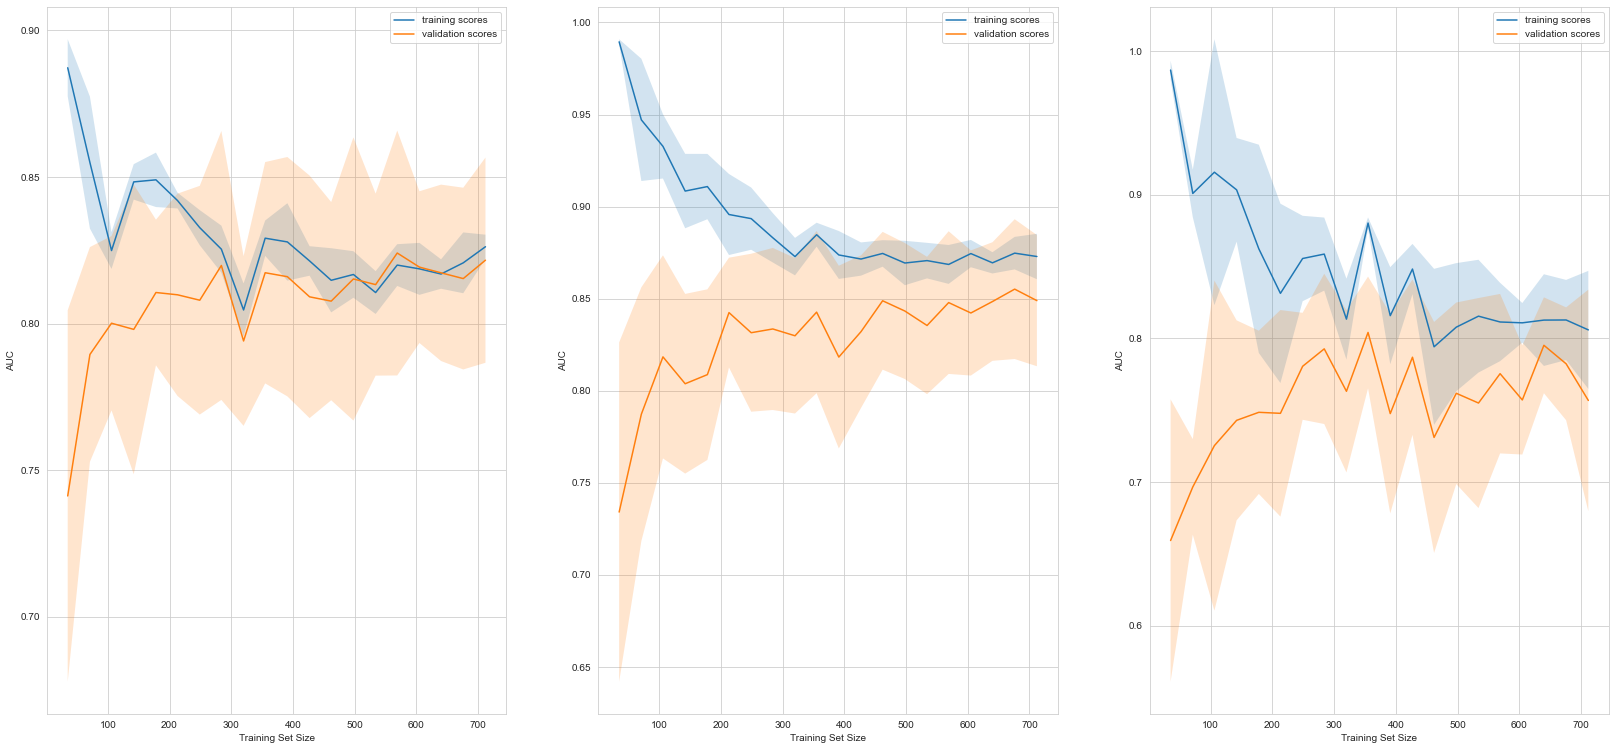

In [846]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)),
    ('sgd_logit', SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha))])
    N_train, val_train, val_test = learning_curve(logit_pipe,
    X[priznaki], y, train_sizes=train_sizes, cv=5,
    scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('AUC')
    plt.legend()

plt.figure(figsize=(28, 13))
plt.subplot(1,3,1)
plot_learning_curve(degree=2, alpha=10)
plt.subplot(1,3,2)
plot_learning_curve(degree=2, alpha=0.05)
plt.subplot(1,3,3)
plot_learning_curve(degree=2, alpha=0.0001)

In [843]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cab_nan,Age_NaN,Young,Old,Family,Title,Alone
0,1,3,1,22.000000,1,0,7.2500,0,1.0,1,0,0,0,1,3,0
1,2,1,0,38.000000,1,0,71.2833,3,2.0,0,0,0,0,1,1,0
2,3,3,0,26.000000,0,0,7.9250,0,1.0,1,0,0,0,0,0,1
3,4,1,0,35.000000,1,0,53.1000,3,1.0,0,0,0,0,1,1,0
4,5,3,1,35.000000,0,0,8.0500,0,1.0,1,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0,1.0,1,0,0,0,0,4,1
887,888,1,0,19.000000,0,0,30.0000,2,1.0,0,0,0,0,0,0,1
888,889,3,0,16.123188,1,2,23.4500,0,1.0,1,1,0,0,3,0,0
889,890,1,1,26.000000,0,0,30.0000,3,2.0,0,0,0,0,0,3,1


In [692]:
alg_test = xgb.XGBClassifier(learning_rate=0.02, max_depth=2, n_estimators=370)

alg_test.fit(cheat[priznaki], cheat.Survived)

predictions = alg_test.predict(test_df[priznaki])

submission_xgb = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})

submission_xgb.to_csv("titanic-xgb-submission2.csv", index=False)

In [667]:

alg_test = RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                        n_estimators=650)

alg_test.fit(cheat.drop('Survived', axis=1), cheat.Survived)

predictions = alg_test.predict(cheat.drop('Survived', axis=1))

submission_les = pd.DataFrame({
    "PassengerId": ch["PassengerId"],
    "Survived": predictions
})

submission_les.to_csv("titanic-les-submission.csv", index=False)


ValueError: array length 1309 does not match index length 418

## 9) Общий вывод о качестве моедли